# Analytics

#### Date: 2021/01

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM: SysArq

##### Semester: 2021/01
##### Professor: Hilmer Neri

##### Members:

- Joao Gabriel Rossi
- Paulo Vitor Coelho
- Joao Matheus
- Ivan Diniz Dobbin
- Gabriel Marcolino
- Carlos Eduardo Roriz
- Lorenzo Santos

### LIBRARIES

In [1]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Datetime
from datetime import datetime

### GRAPH SETTINGS

In [2]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

##### Path to the folder with all your jsons

In [4]:
jsons = glob('../analytics-raw-data/*.json') # add the path here

In [5]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    aux_df = df['filename'].str.split(r"PC-GO1-(.*?)-*-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [6]:
base_component_df = create_base_component_df(jsons)

In [7]:
base_component_df.head(10)

,bestValue,metric,value,filename,repository,version
27,True,duplicated_lines_density,0.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
28,NaN,functions,41,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
29,True,security_rating,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
30,NaN,files,16,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
31,NaN,complexity,42,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
32,NaN,ncloc,878,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
33,False,coverage,97.3,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
34,True,reliability_rating,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
35,False,comment_lines_density,7.7,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
72,True,duplicated_lines_density,0.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-11-2021-...,Archives,03-11-2021-02-10


#### Create dataframe per file

In [8]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [9]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns, dtype=object)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)
        
        file_component_df_py = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'py')
        file_component_df_js = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'js')

        file_component_df_py['filename'] = os.path.basename(i)
        file_component_df_js['filename'] = os.path.basename(i)

        df = df.append(file_component_df_js, ignore_index=True)
        df = df.append(file_component_df_py, ignore_index=True)
          
    aux_df = df['filename'].str.split(r"PC-GO1-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

In [10]:
file_component_df = create_file_df(jsons)

In [11]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
217,archives_app/migrations/0001_initial.py,0,0,1.2,0.0,0.0,85,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
218,archives_app/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
219,archives_app/migrations/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
220,project/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
221,archives_app/admin.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
222,archives_app/apps.py,0,0,0.0,0.0,100.0,3,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
223,project/asgi.py,0,0,66.7,0.0,NaN,4,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
224,manage.py,1,2,16.7,0.0,NaN,15,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
225,archives_app/models.py,0,0,0.0,0.0,100.0,39,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47
226,archives_app/serializers.py,0,0,0.0,0.0,100.0,65,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2021_1-PC-GO1-Archives-03-10-2021-...,Archives,03-10-2021-15-47


#### Create dataframe per repository

In [12]:
archives_df = file_component_df[file_component_df['repository'] == 'Archives']
profile_df = file_component_df[file_component_df['repository'] == 'Profile']
frontend_df = file_component_df[file_component_df['repository'] == 'Frontend']

In [13]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)
    
    return ncloc

### Measure calculations accordng to Q-Rapids quality model

# Quality Aspect - Maintainability

## Factor - Code Quality 

### Metric calculations

##### COMPLEXITY

In [14]:
def m1(df):
    """
    Is better to have more functions than less functions but more complex ones with greater number of paths
    m1 = 1 is the best possible result
    """
    density_non_complex_files = len(df[((df['complexity'].astype(float)/df['functions'].astype(float)) < 10) | (df['functions'].astype(int) == 0).all()])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [15]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [16]:
def m3(df):
    """
    Is better to have less duplicated lines
    m3 = 1 is the best possible result
    """
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

# Quality Aspect - Reliability

## Factor - Testing Status

##### Passed tests

In [17]:
def m4(df):
    """
    m4 = 1 is the optimal result
    """
    passed_tests = df['test_success_density'].astype(float).median() / 100

    return passed_tests

#### Fast test builds

In [18]:
def m5(df):
    """
    m5 = 1 is the optimal result
    """
    density_fast_test_builds = len(df[(df['test_execution_time'].astype(float)) < 300]) / sum(df['tests'].astype(float))

    return density_fast_test_builds

#### Test coverage

In [19]:
def m6(df):
    """
    m6 = 1 is the optimal result
    """
    density_test_coverage = len(df[(df['coverage'].astype(float) > 60)]) / len(df)

    return density_test_coverage


### Calculate m1, m2, m3, m4, m5 and m6 for each repository

In [66]:
def drop_unnecessary_files(df):
    new_df = df[~df['path'].str.contains('test')]
    new_df = new_df[~new_df['path'].str.contains('init')]
    new_df = new_df[~new_df['path'].str.contains('manage')]
    new_df = new_df[~new_df['path'].str.contains('asgi')]
    new_df = new_df[~new_df['path'].str.contains('wsgi')]
    new_df = new_df[~new_df['path'].str.contains('admin')]
    new_df = new_df[~new_df['path'].str.contains('models')]
    new_df = new_df[~new_df['path'].str.contains('models')]
    new_df = new_df[~new_df['path'].str.contains('reportWebVitals')]
    new_df = new_df[~new_df['path'].str.contains('setupTests')]
    new_df = new_df[~new_df['path'].str.contains('Home')]
    return new_df

In [67]:
new_archives_df = drop_unnecessary_files(archives_df)
new_frontend_df = drop_unnecessary_files(frontend_df)
new_profile_df = drop_unnecessary_files(profile_df)

In [68]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []

    ncloc_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        m4_list.append(m4(version_df))
        m6_list.append(m6(version_df))

        ncloc_list.append(_ncloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'm4': m4_list,
                               'm6': m6_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list})
        
    return metrics_df

In [69]:
archives_metrics = create_metrics_df(new_archives_df)
profile_metrics = create_metrics_df(new_profile_df)
frontend_metrics = create_metrics_df(new_frontend_df)

### Data visualization

- You must do this for each of your repositories

# ARCHIVES

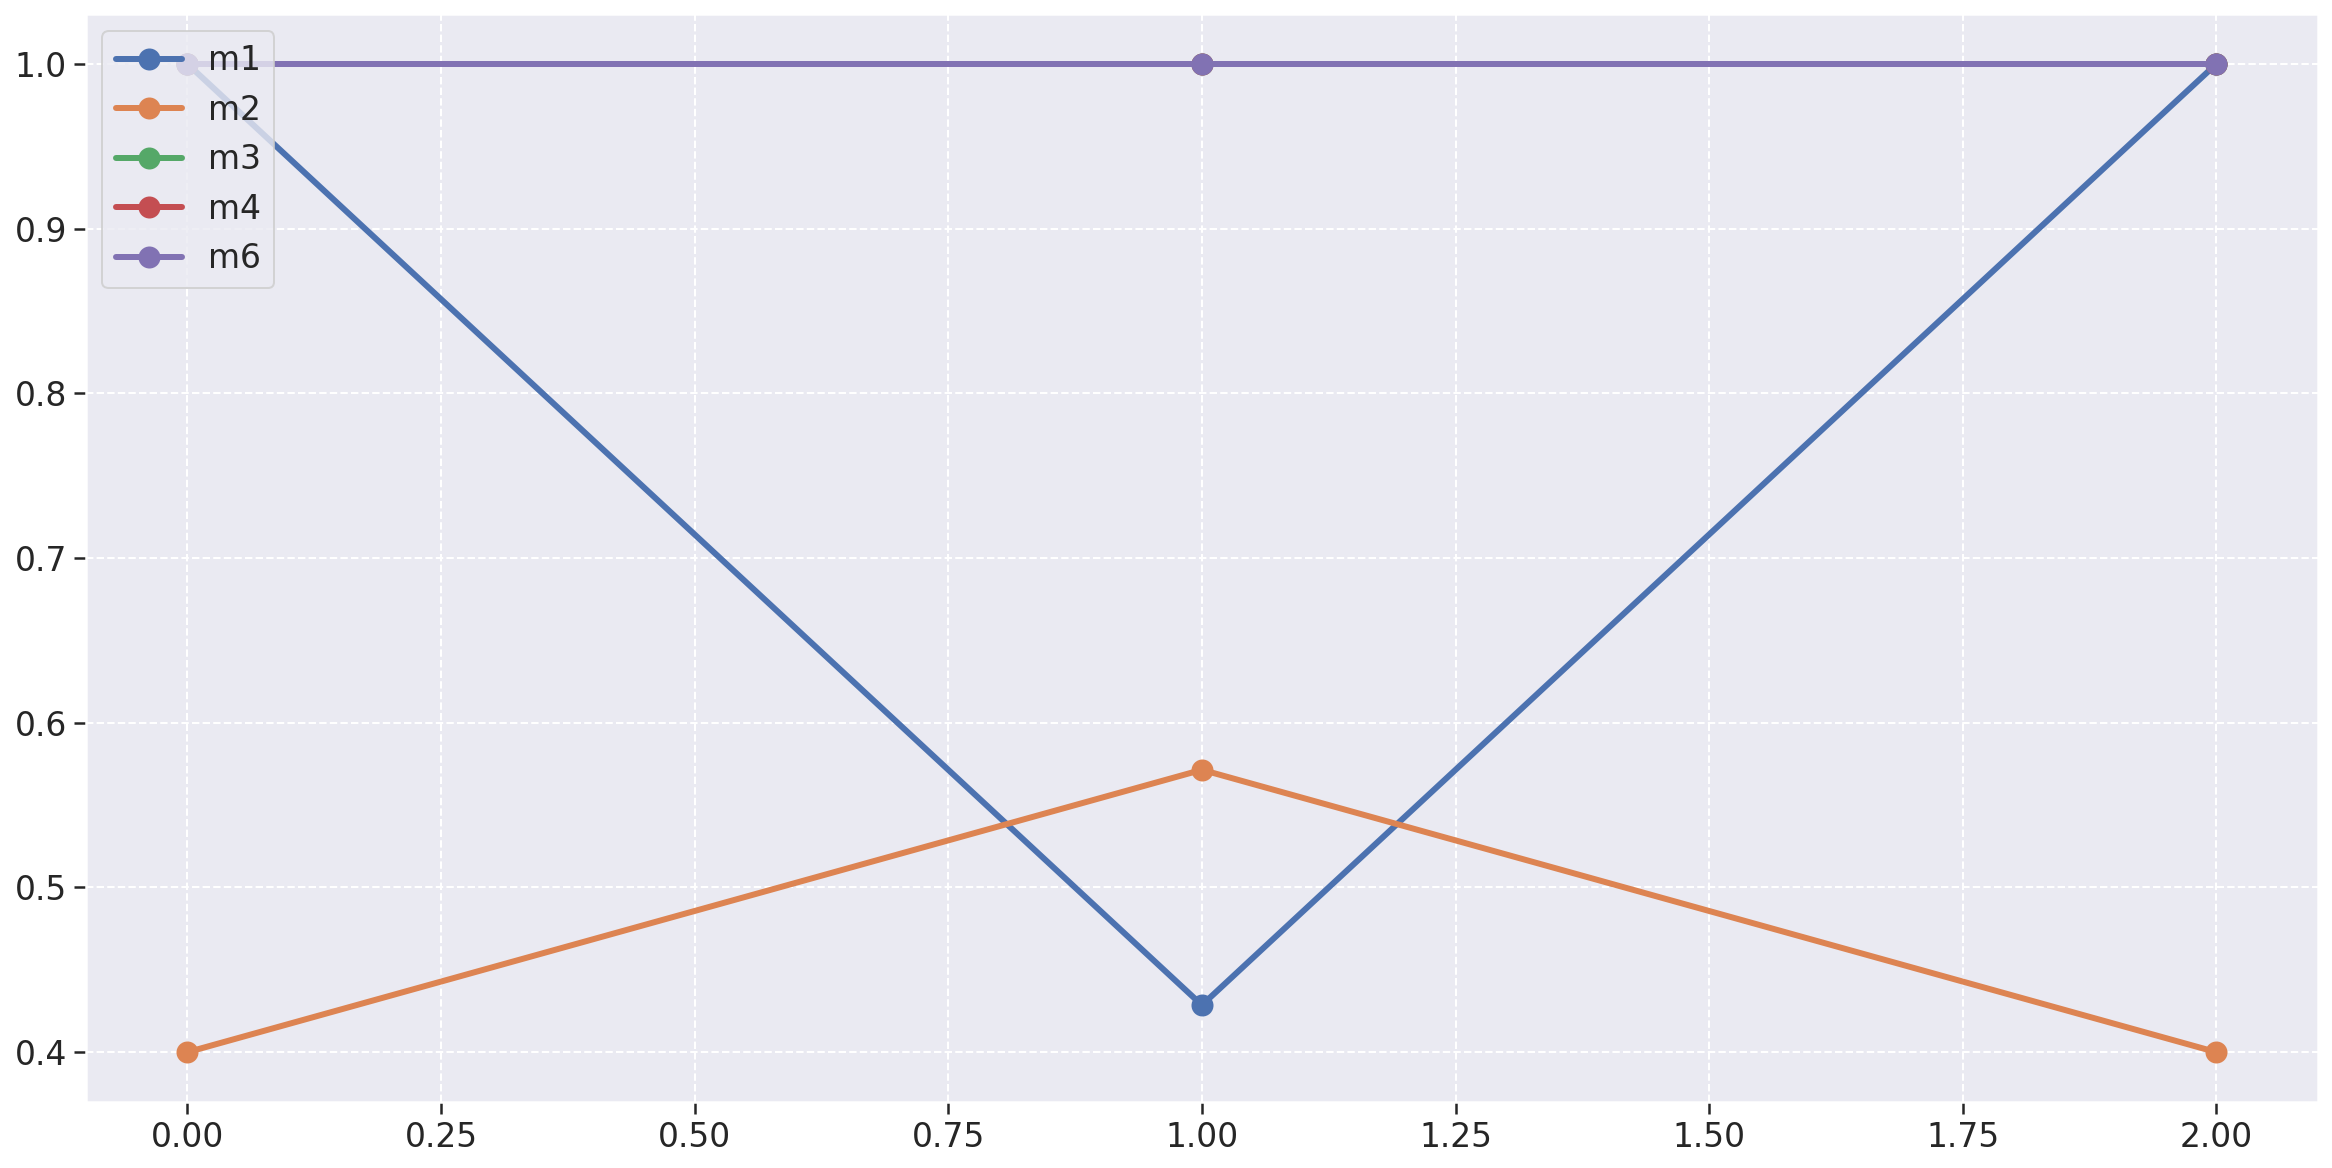

In [70]:
fig = plt.figure(figsize=(20, 10))

plt.plot(archives_metrics['m1'], linewidth=3, marker='o', markersize=10, label='m1')
plt.plot(archives_metrics['m2'], linewidth=3, marker='o', markersize=10, label='m2')
plt.plot(archives_metrics['m3'], linewidth=3, marker='o', markersize=10, label='m3')
plt.plot(archives_metrics['m4'], linewidth=3, marker='o', markersize=10, label='m4')
plt.plot(archives_metrics['m6'], linewidth=3, marker='o', markersize=10, label='m6')

plt.legend(loc='upper left')

# Profile

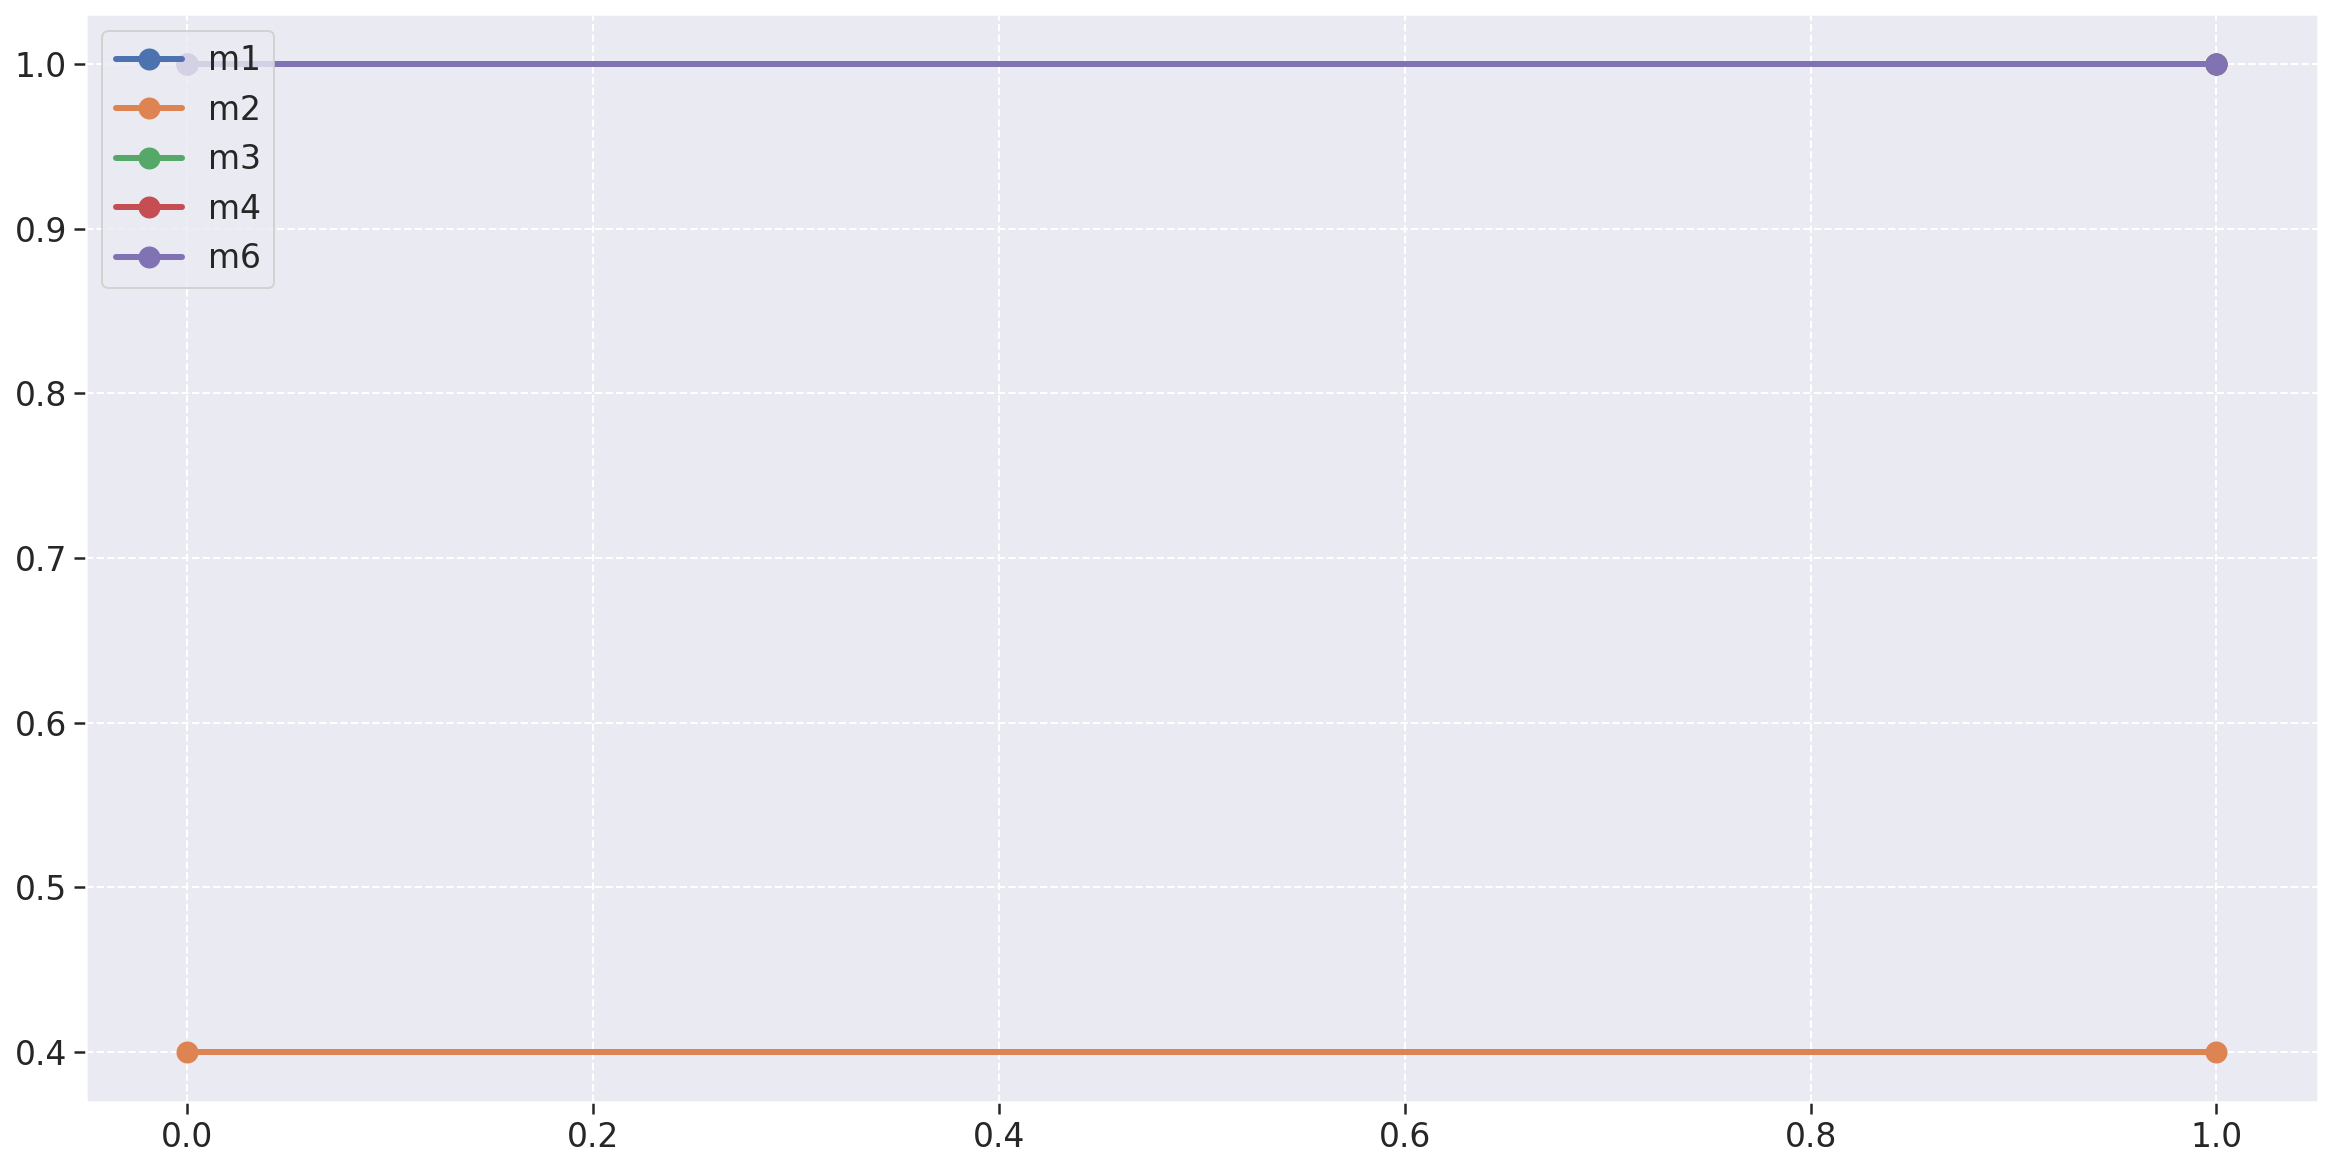

In [71]:
fig = plt.figure(figsize=(20, 10))

plt.plot(profile_metrics['m1'], linewidth=3, marker='o', markersize=10, label='m1')
plt.plot(profile_metrics['m2'], linewidth=3, marker='o', markersize=10, label='m2')
plt.plot(profile_metrics['m3'], linewidth=3, marker='o', markersize=10, label='m3')
plt.plot(profile_metrics['m4'], linewidth=3, marker='o', markersize=10, label='m4')
plt.plot(profile_metrics['m6'], linewidth=3, marker='o', markersize=10, label='m6')

plt.legend(loc='upper left')

# Frontend

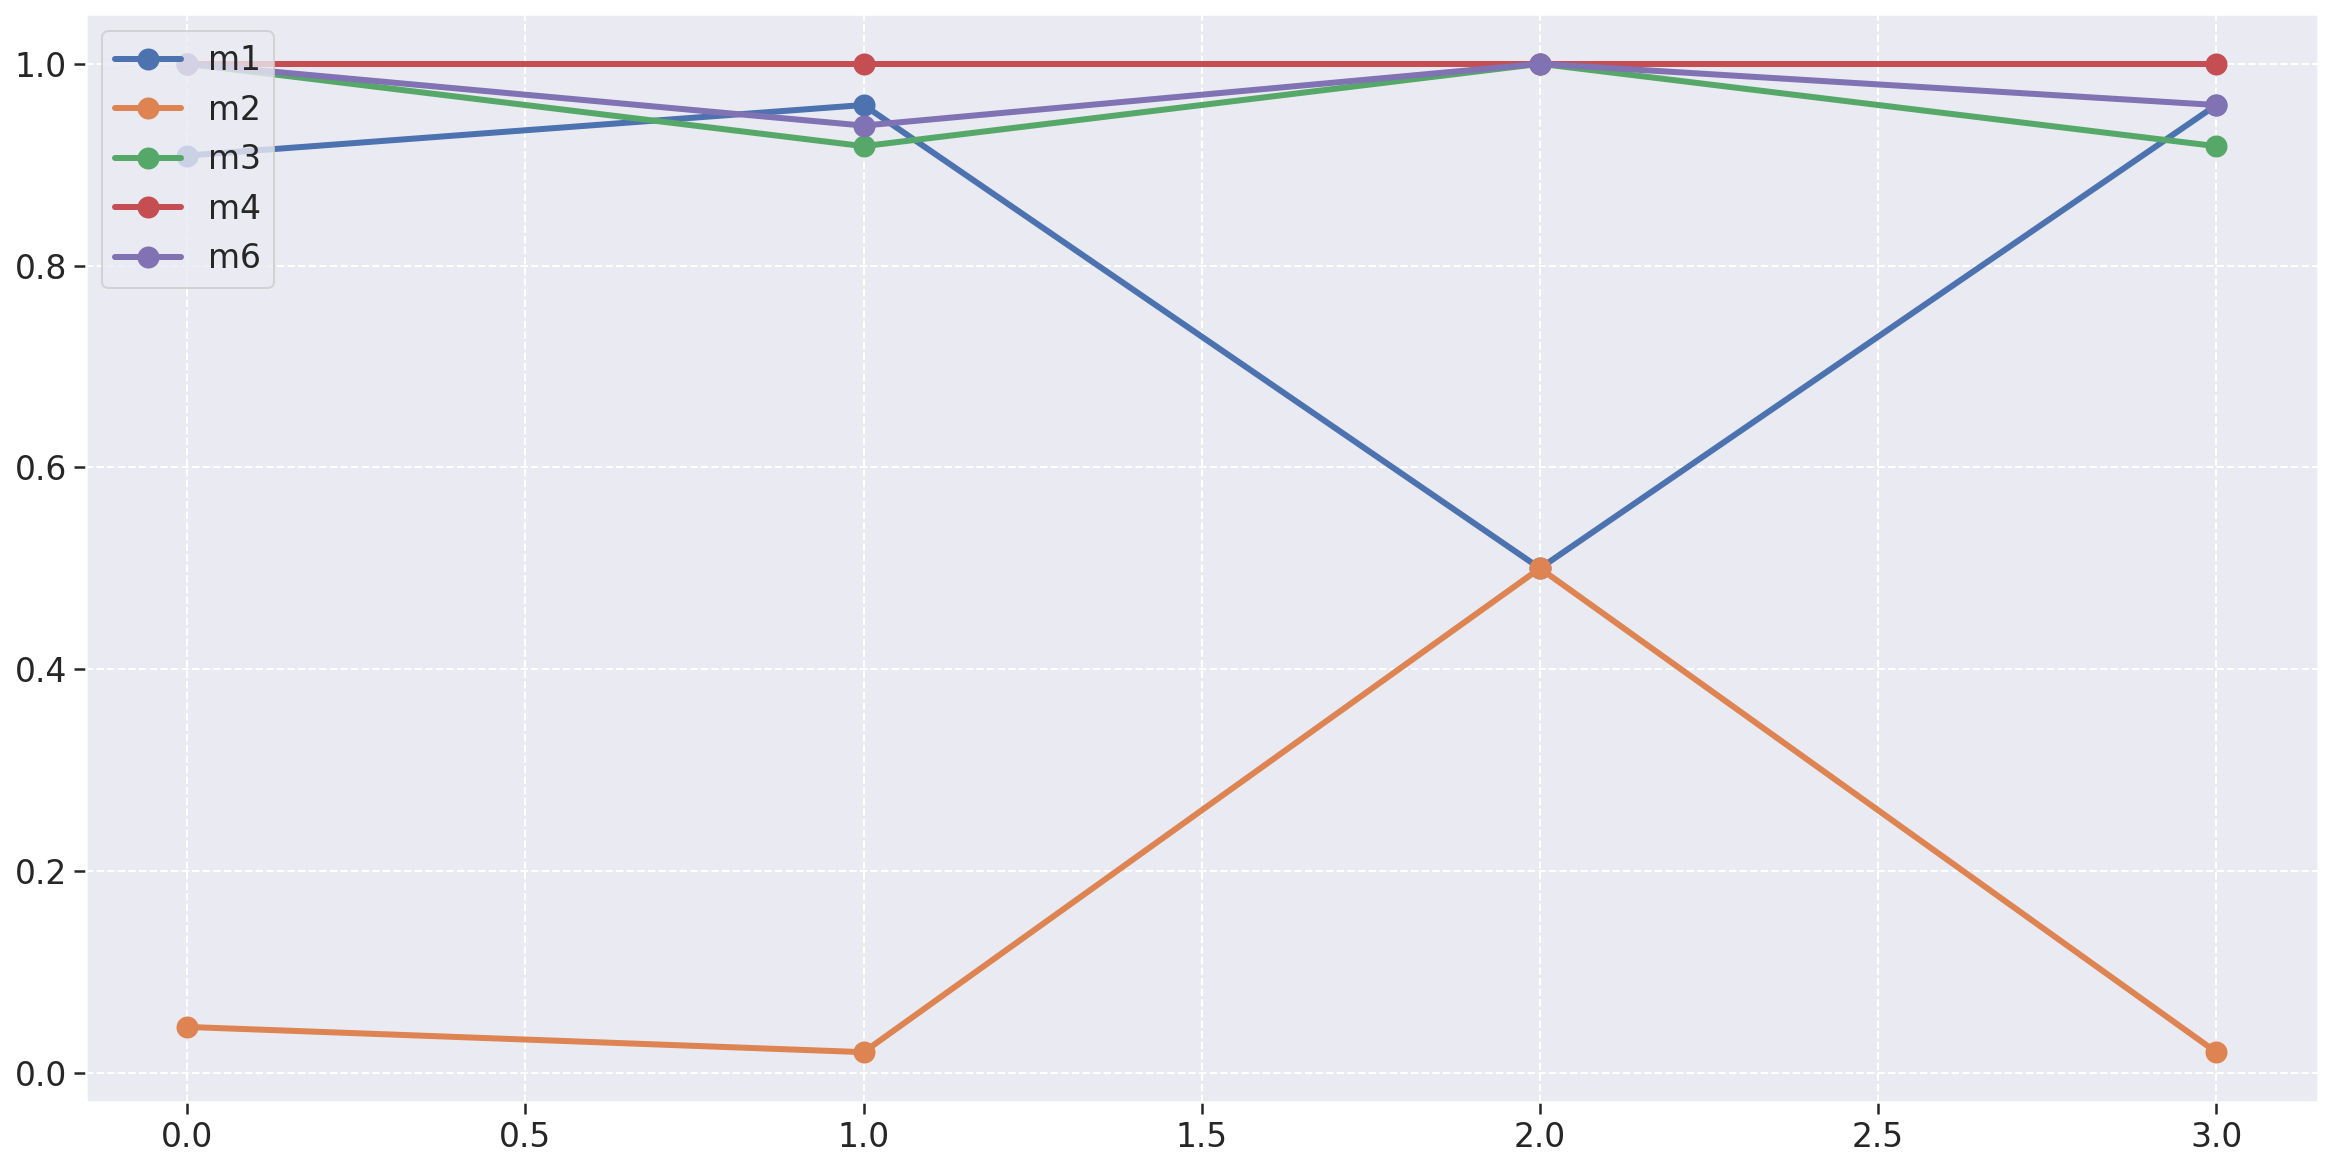

In [72]:
fig = plt.figure(figsize=(20, 10))

plt.plot(frontend_metrics['m1'], linewidth=3, marker='o', markersize=10, label='m1')
plt.plot(frontend_metrics['m2'], linewidth=3, marker='o', markersize=10, label='m2')
plt.plot(frontend_metrics['m3'], linewidth=3, marker='o', markersize=10, label='m3')
plt.plot(frontend_metrics['m4'], linewidth=3, marker='o', markersize=10, label='m4')
plt.plot(frontend_metrics['m6'], linewidth=3, marker='o', markersize=10, label='m6')

plt.legend(loc='upper left')

### Sub characteristic aggregation

- You must do this for each of your repositories

In [73]:
psc1 = 1
psc2 = 1
pc1 = 0.5
pc2 = 0.5
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

pm4 = 0.3
pm6 = 0.7

archives_metrics['code_quality'] = ((archives_metrics['m1']*pm1)+(archives_metrics['m2']*pm2)+(archives_metrics['m3']*pm3))*psc1
profile_metrics['code_quality'] = ((profile_metrics['m1']*pm1)+(profile_metrics['m2']*pm2)+(profile_metrics['m3']*pm3))*psc1
frontend_metrics['code_quality'] = ((frontend_metrics['m1']*pm1)+(frontend_metrics['m2']*pm2)+(frontend_metrics['m3']*pm3))*psc1

archives_metrics['testing_status'] = ((archives_metrics['m4']*pm4)+(archives_metrics['m6']*pm6))*psc2
profile_metrics['testing_status'] = ((profile_metrics['m4']*pm4)+(profile_metrics['m6']*pm6))*psc2
frontend_metrics['testing_status'] = ((frontend_metrics['m4']*pm4)+(frontend_metrics['m6']*pm6))*psc2

## Code Quality 

No handles with labels found to put in legend.


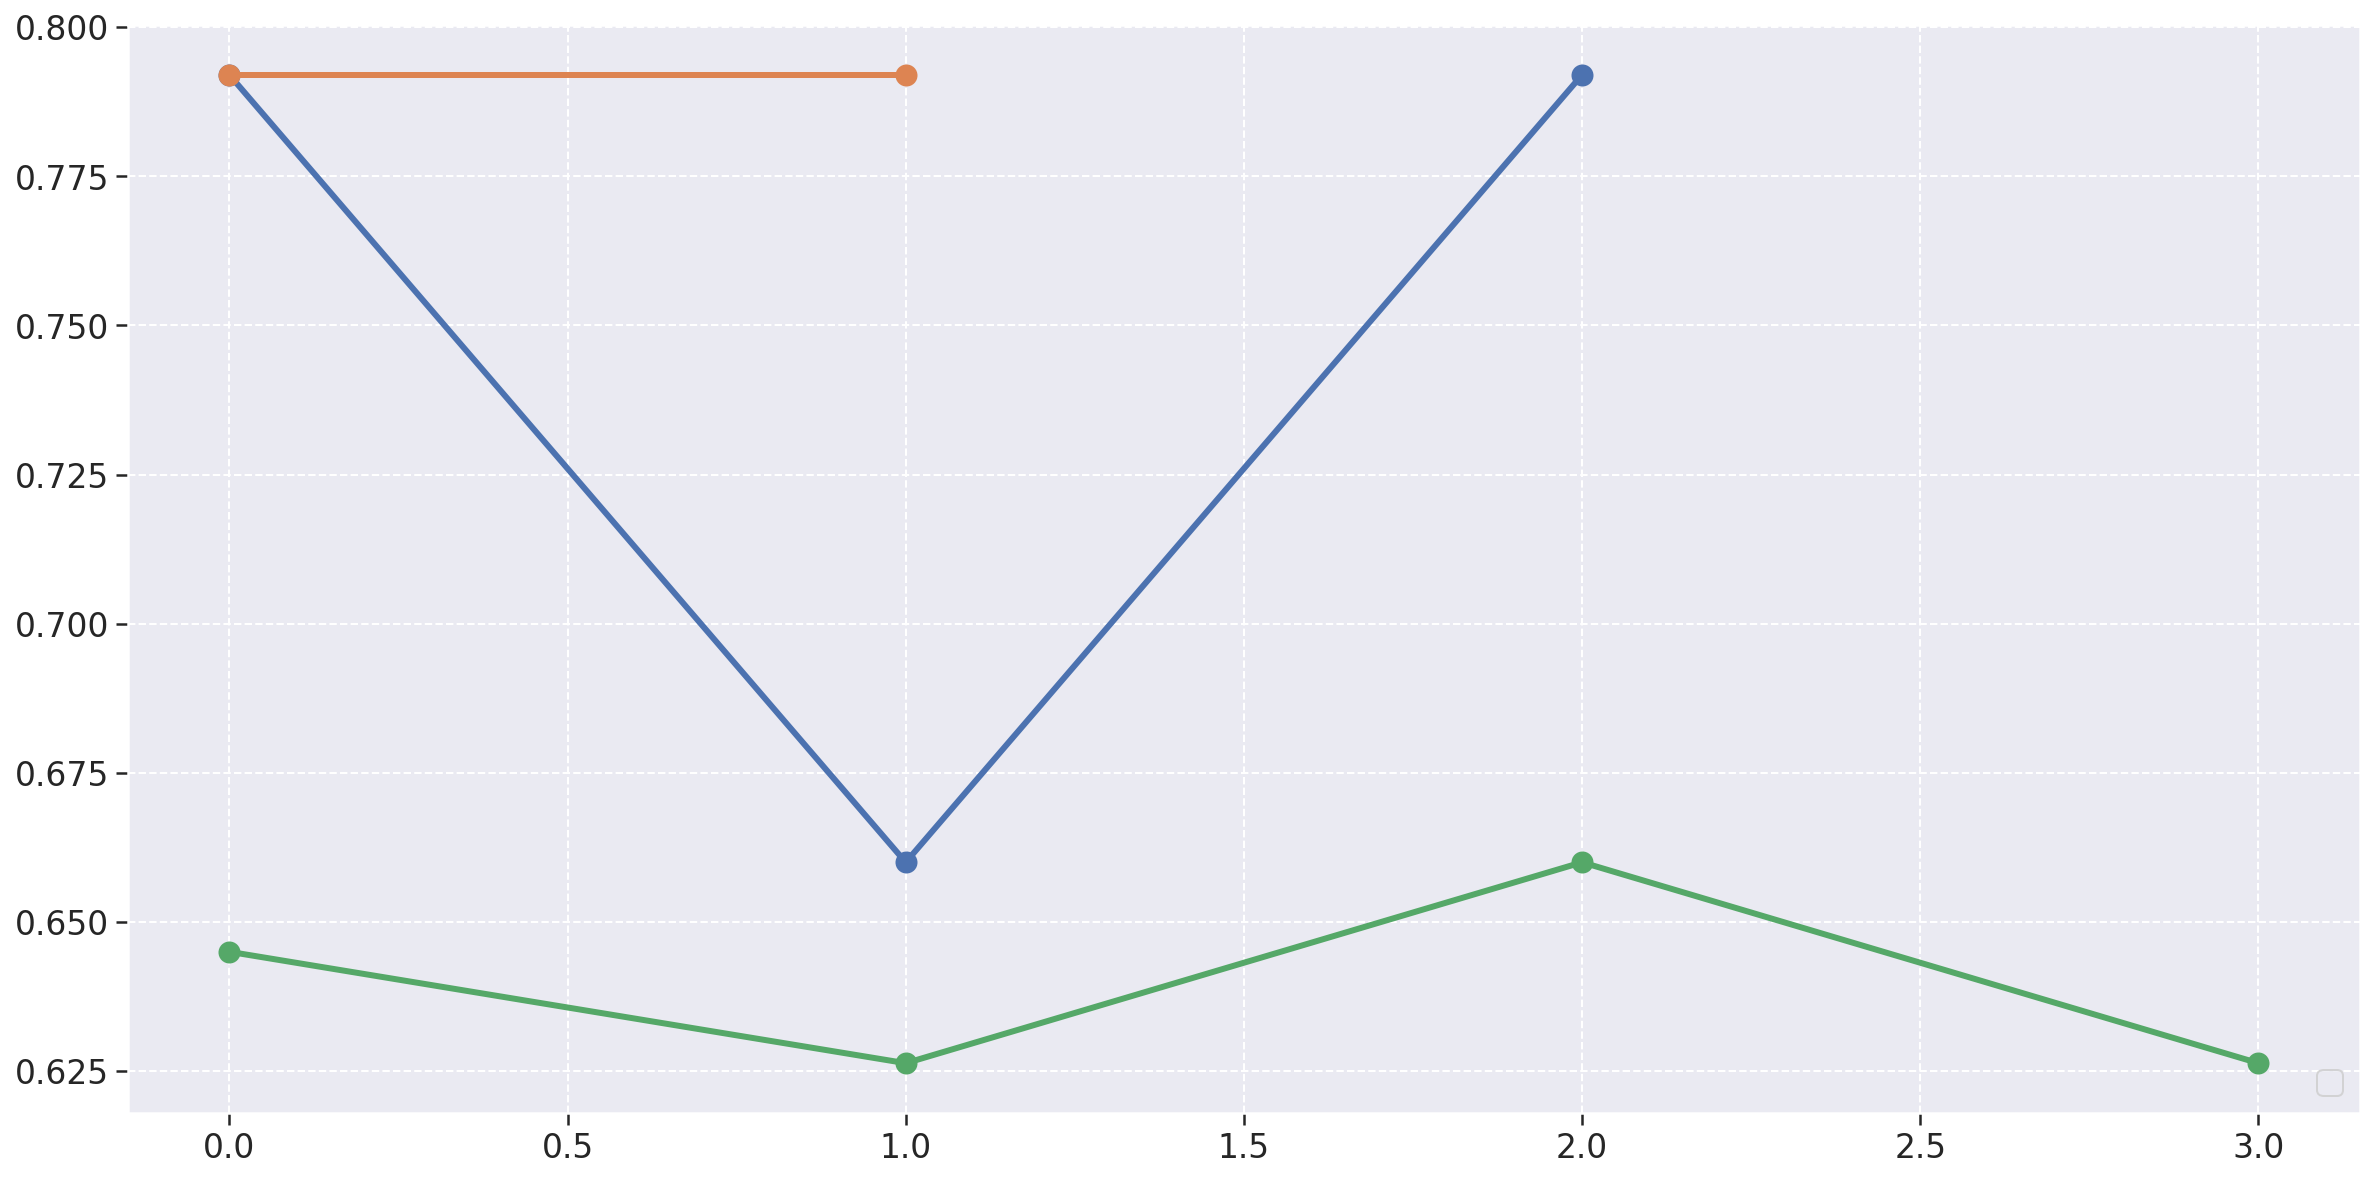

In [74]:
fig = plt.figure(figsize=(20, 10))

plt.plot(archives_metrics['code_quality'], linewidth=3, marker='o', markersize=10)
plt.plot(profile_metrics['code_quality'], linewidth=3, marker='o', markersize=10)
plt.plot(frontend_metrics['code_quality'], linewidth=3, marker='o', markersize=10)

plt.legend(loc='lower right')

## Testing Status

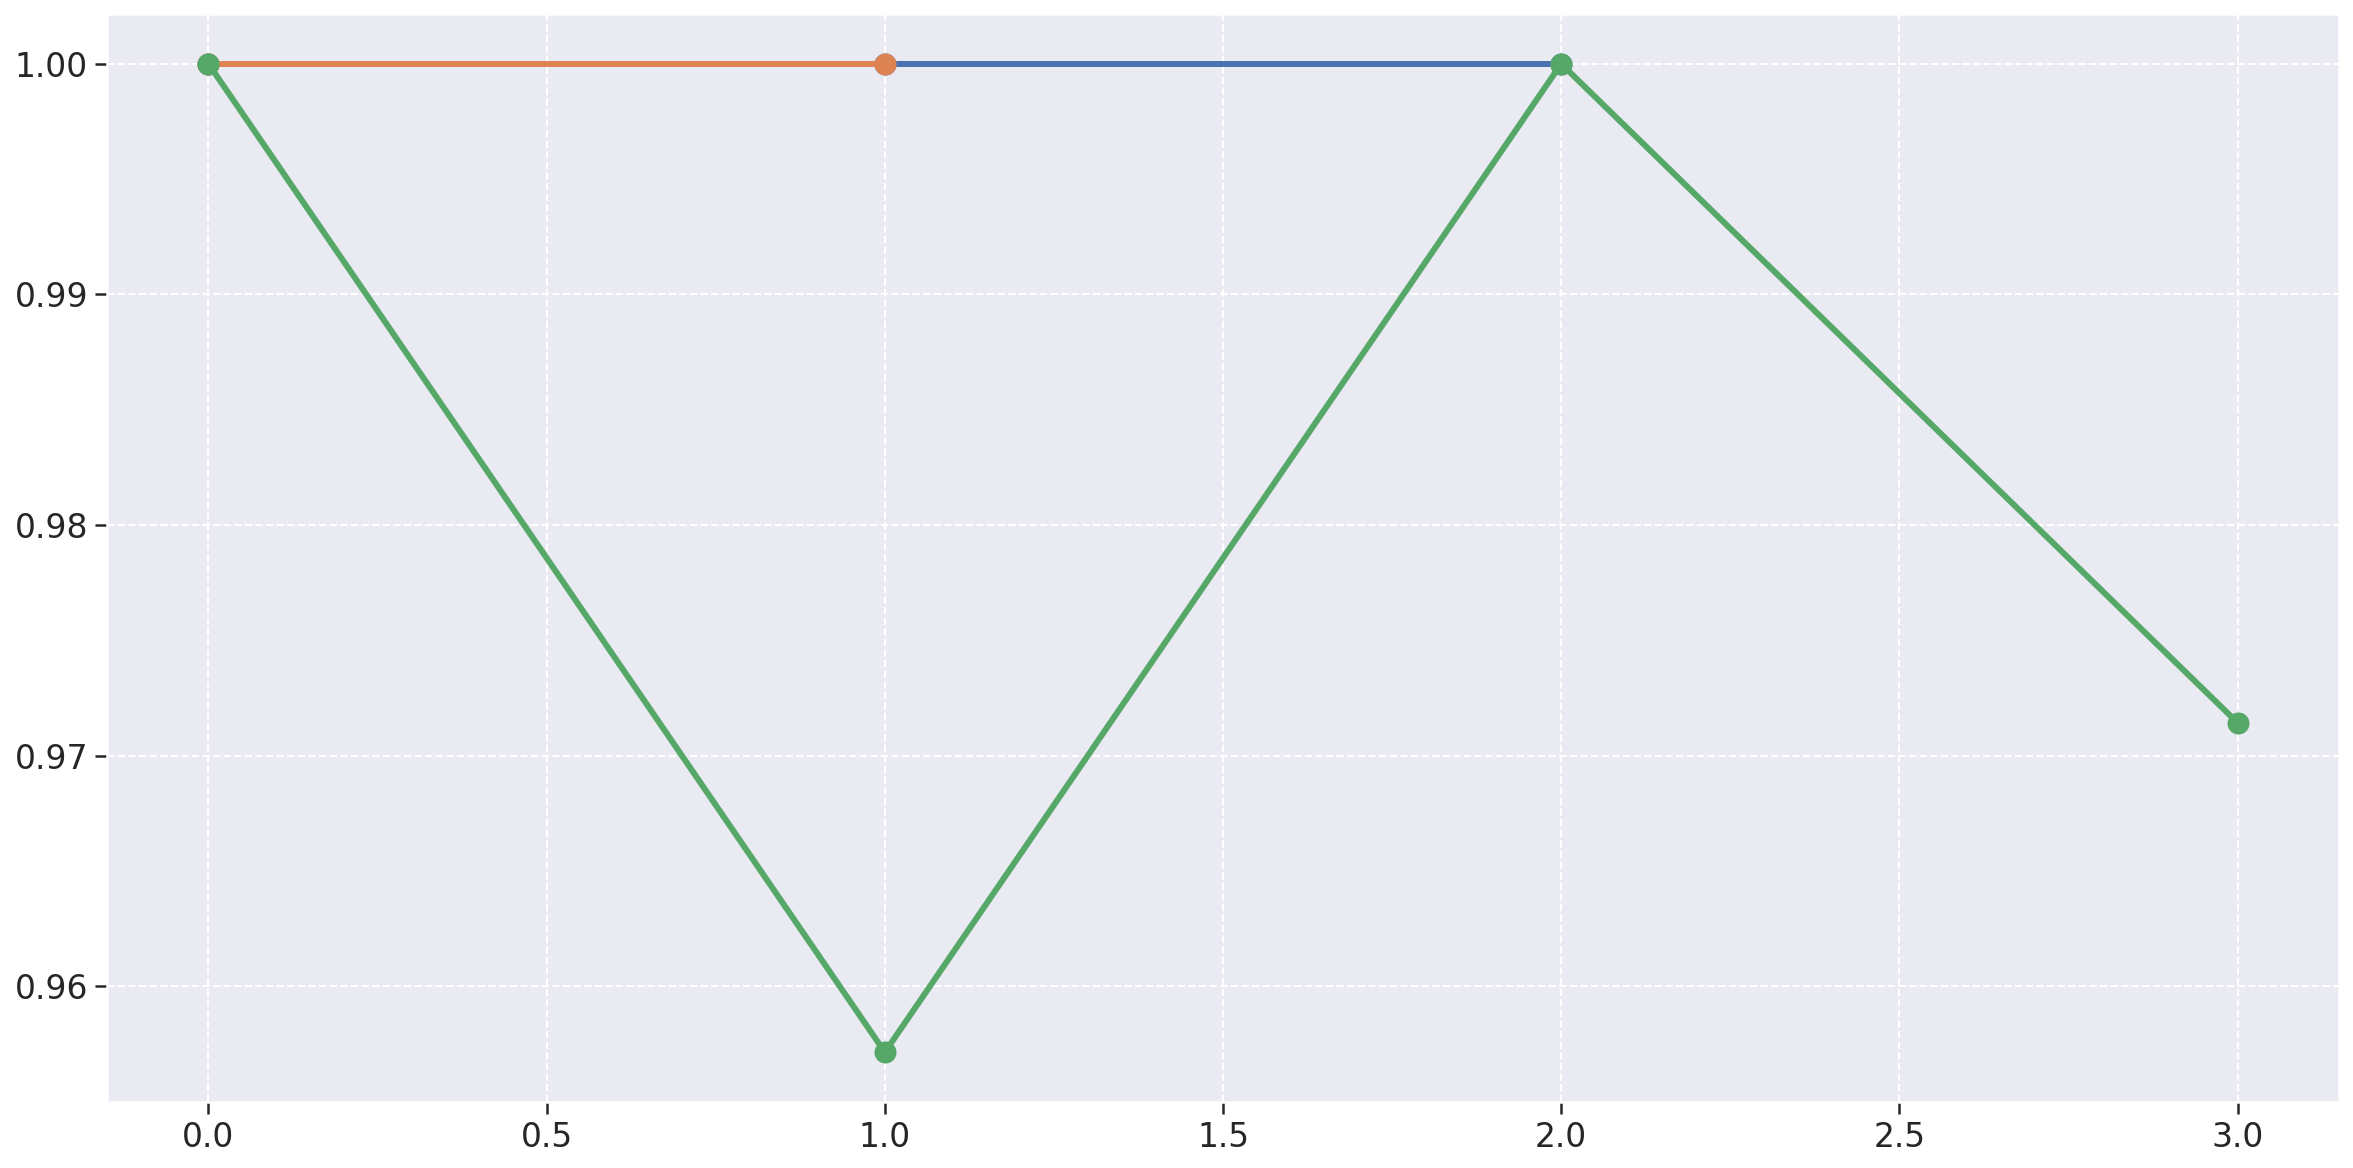

In [75]:
fig = plt.figure(figsize=(20, 10))

plt.plot(archives_metrics['testing_status'], linewidth=3, marker='o', markersize=10)
plt.plot(profile_metrics['testing_status'], linewidth=3, marker='o', markersize=10)
plt.plot(frontend_metrics['testing_status'], linewidth=3, marker='o', markersize=10)

## All Metrics

In [76]:
metrics_df = pd.concat([archives_metrics, profile_metrics, frontend_metrics], ignore_index=True)

metrics_df['maintainability'] = metrics_df['code_quality'] * pc1
metrics_df['Reliability'] = metrics_df['testing_status'] * pc2
metrics_df['total'] = metrics_df['maintainability'] + metrics_df['Reliability']

In [77]:
metrics_df

,m1,m2,m3,m4,m6,repository,version,ncloc,code_quality,testing_status,maintainability,Reliability,total
0,1.000000,0.400000,1.000000,1.0,1.000000,Archives,03-10-2021-15-47,200,0.792000,1.000000,0.396000,0.500000,0.896000
1,0.428571,0.571429,1.000000,1.0,1.000000,Archives,03-11-2021-02-10,428,0.660000,1.000000,0.330000,0.500000,0.830000
2,1.000000,0.400000,1.000000,1.0,1.000000,Archives,13-09-2021-15-00,109,0.792000,1.000000,0.396000,0.500000,0.896000
3,1.000000,0.400000,1.000000,1.0,1.000000,Profile,03-10-2021-15-48,112,0.792000,1.000000,0.396000,0.500000,0.896000
4,1.000000,0.400000,1.000000,1.0,1.000000,Profile,13-09-2021-14-00,112,0.792000,1.000000,0.396000,0.500000,0.896000
5,0.909091,0.045455,1.000000,1.0,1.000000,Frontend,03-10-2021-15-49,1401,0.645000,1.000000,0.322500,0.500000,0.822500
6,0.959184,0.020408,0.918367,1.0,0.938776,Frontend,03-11-2021-02-08,4888,0.626327,0.957143,0.313163,0.478571,0.791735
7,0.500000,0.500000,1.000000,1.0,1.000000,Frontend,13-09-2021-20-00,35,0.660000,1.000000,0.330000,0.500000,0.830000
8,0.959184,0.020408,0.918367,1.0,0.959184,Frontend,17-10-2021-15-30,4858,0.626327,0.971429,0.313163,0.485714,0.798878


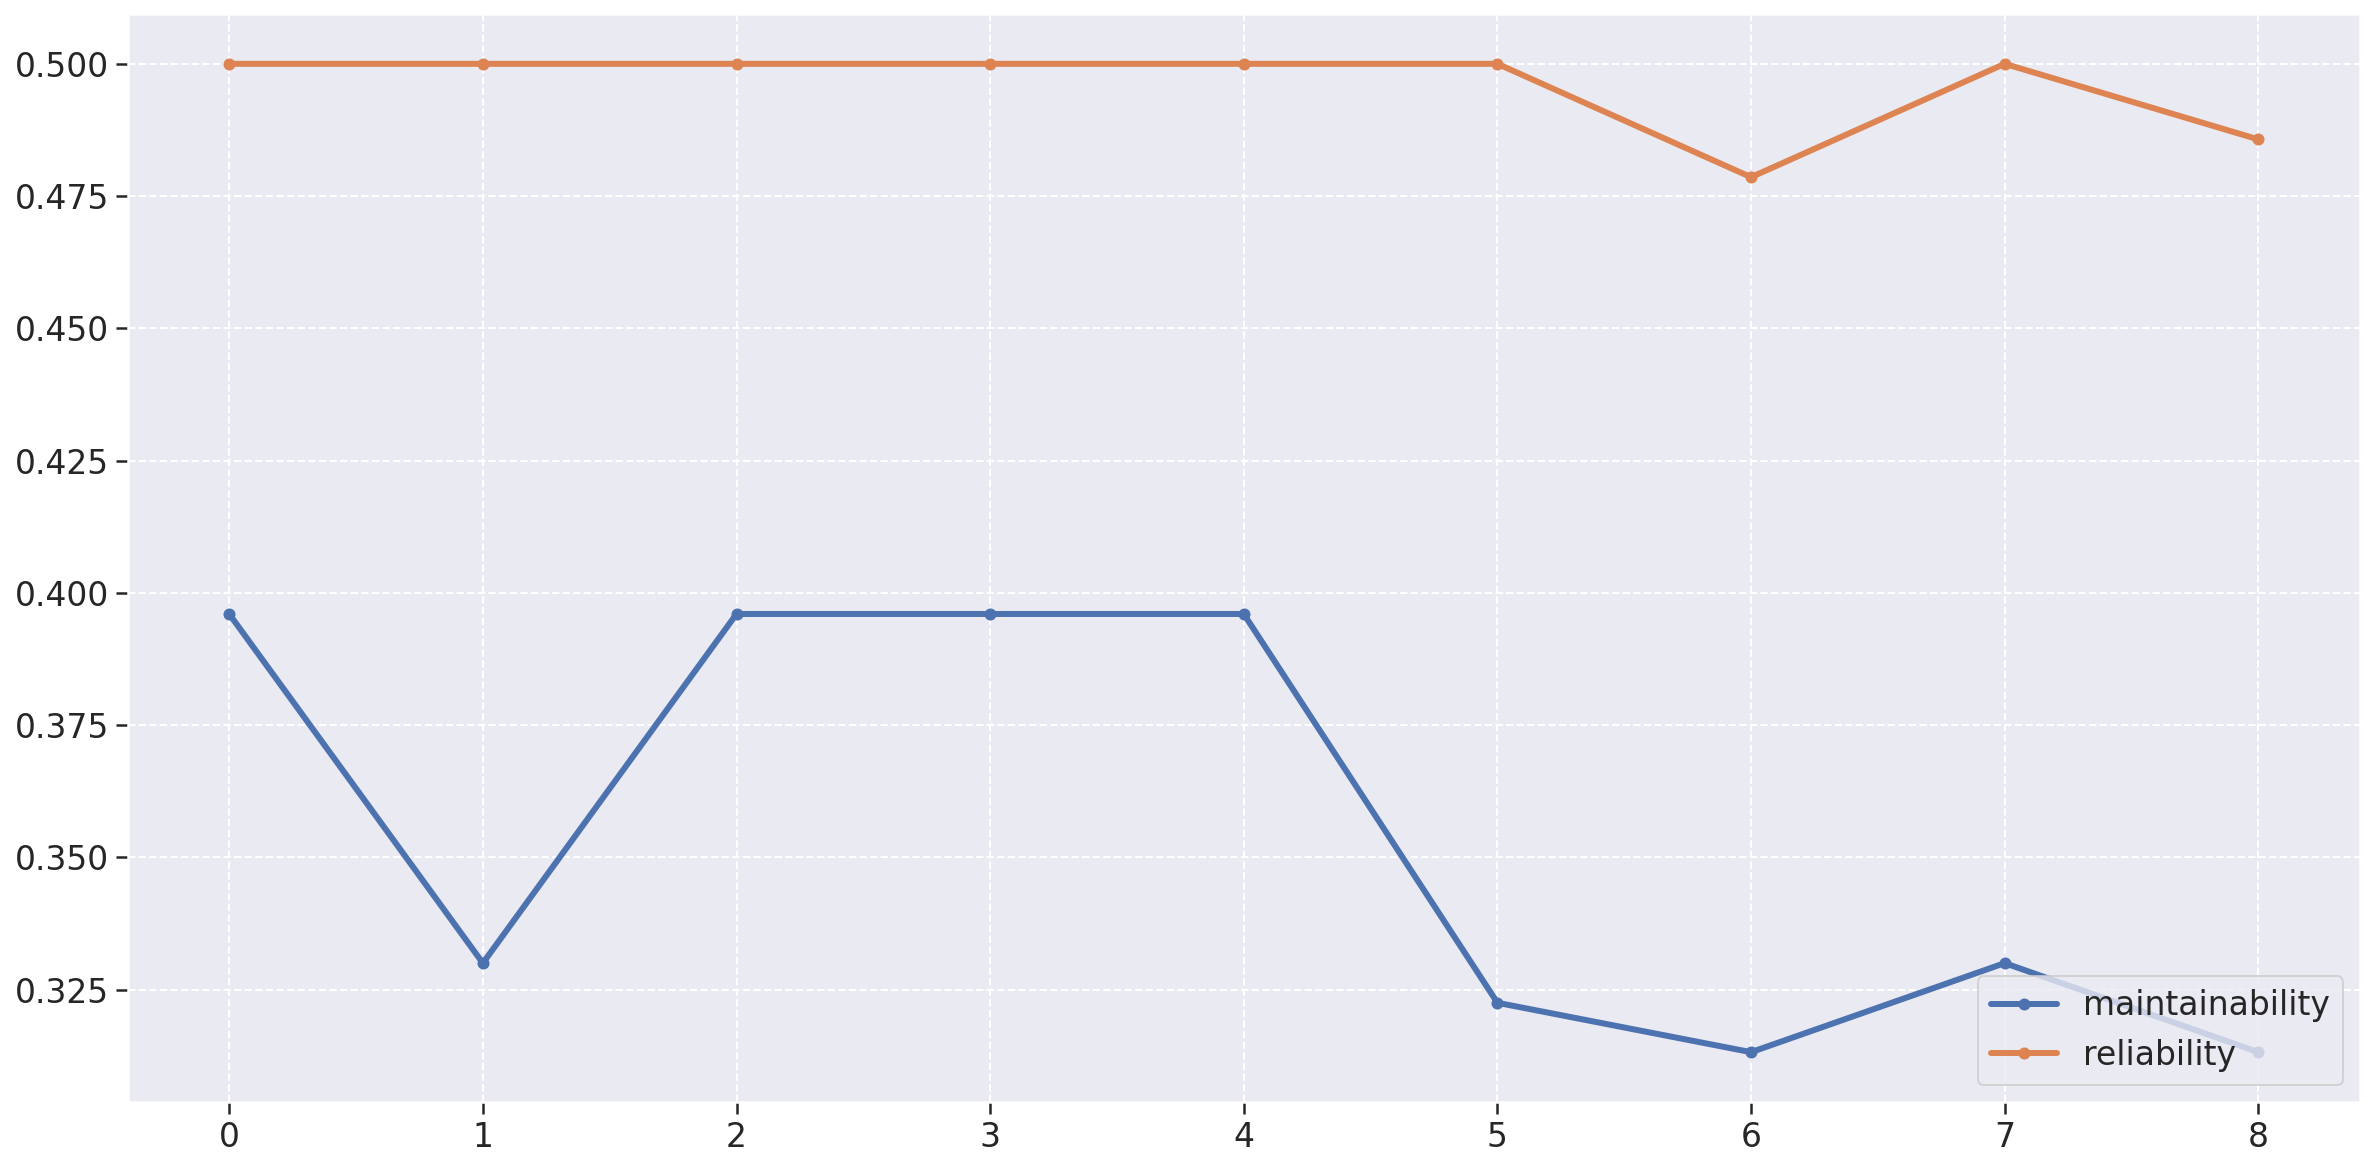

In [78]:
fig = plt.figure(figsize=(20, 10))

plt.plot(metrics_df['maintainability'], linewidth=3, marker='o', markersize=5, label='maintainability')
plt.plot(metrics_df['Reliability'], linewidth=3, marker='o', markersize=5, label='reliability')

plt.legend(loc='lower right')

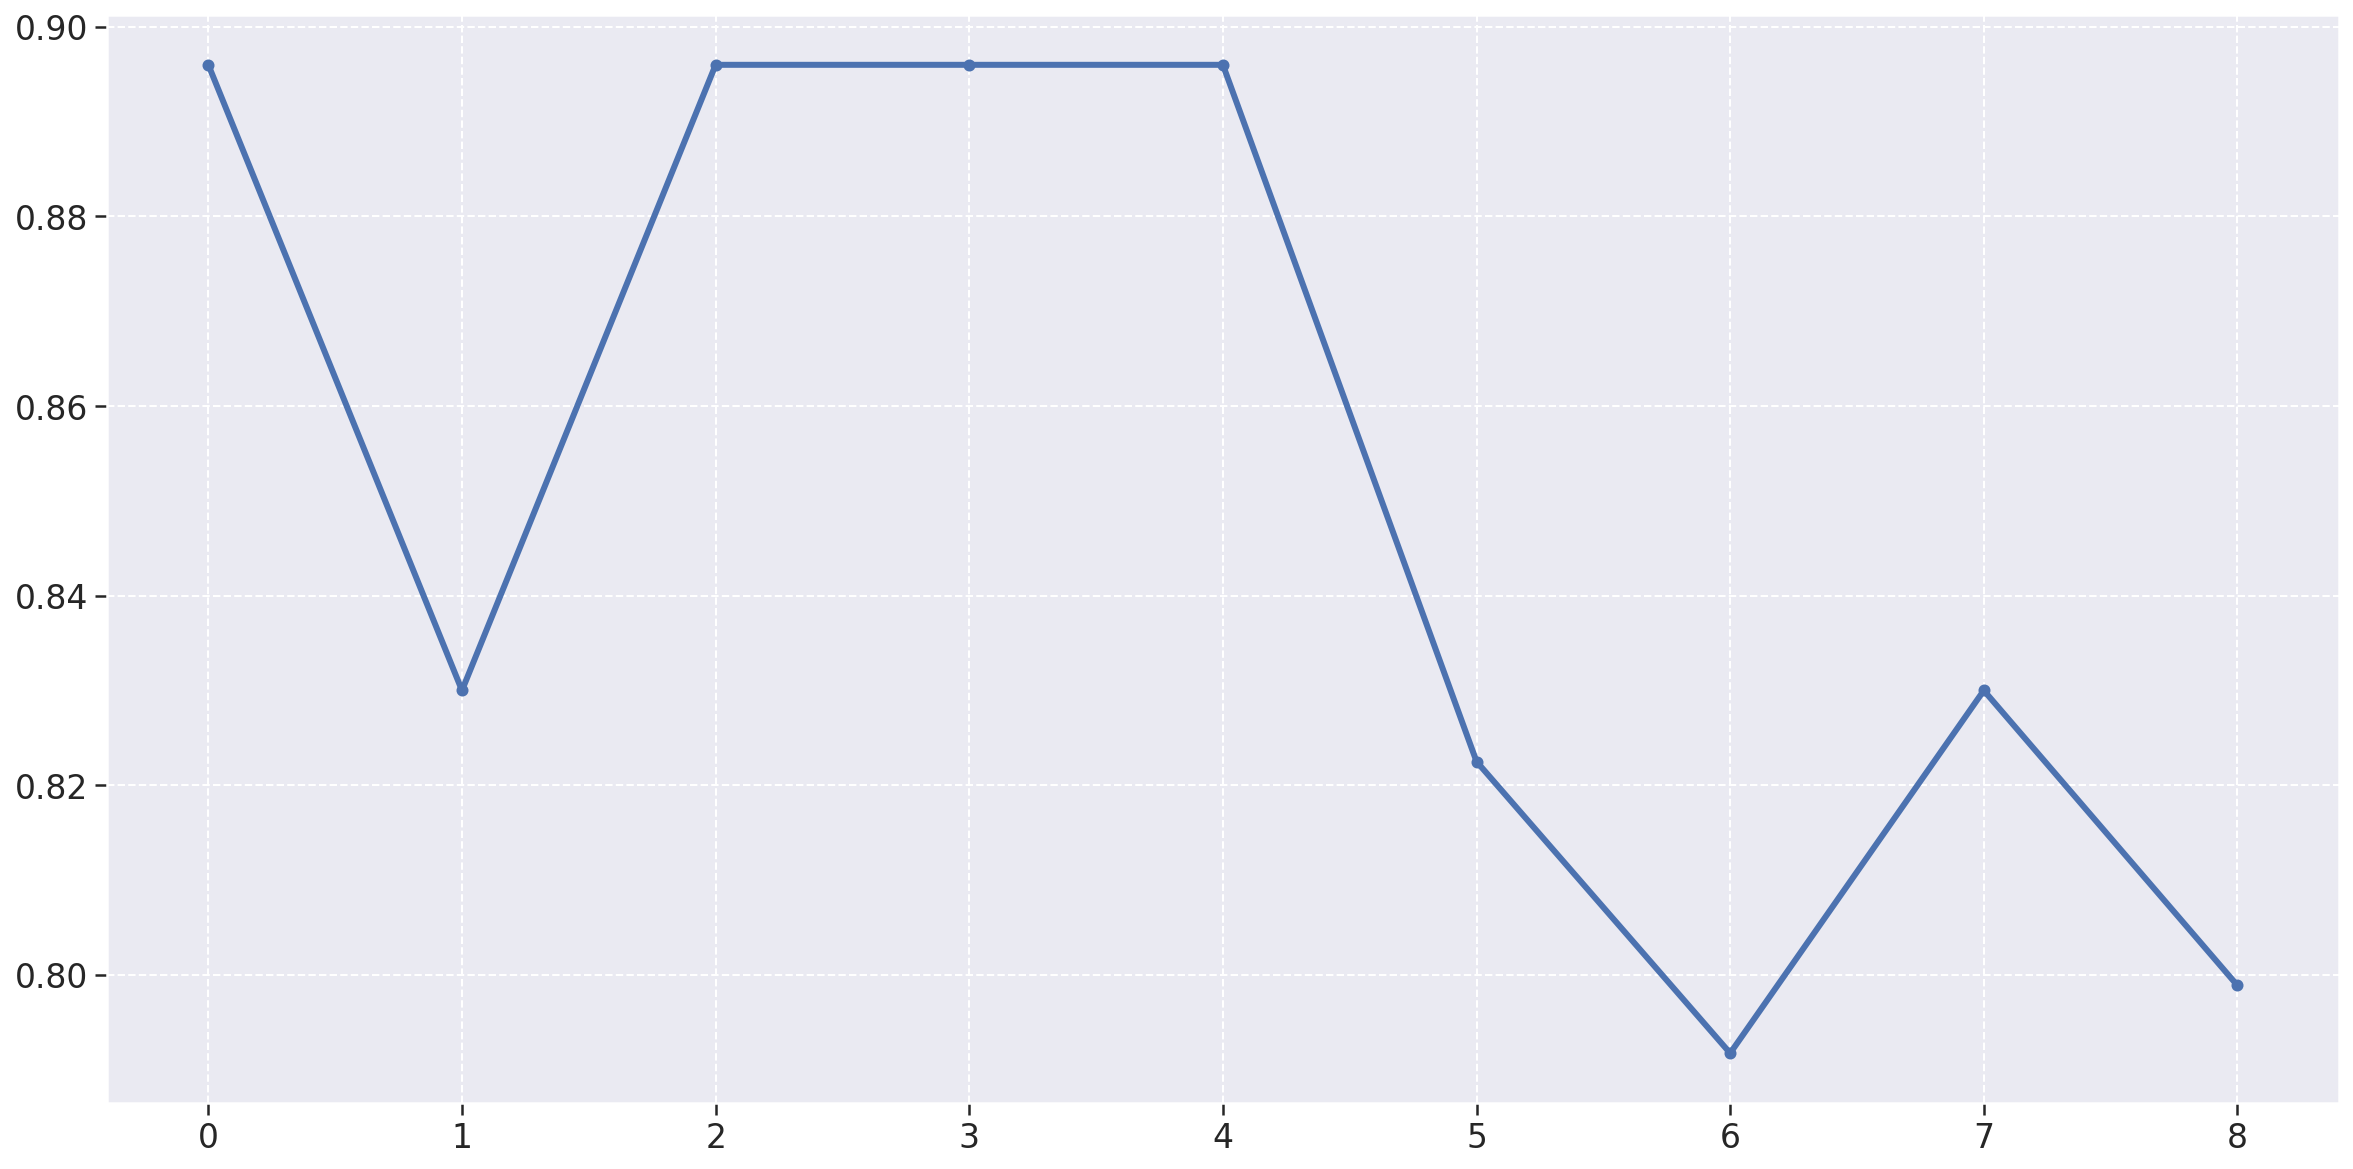

In [79]:
fig = plt.figure(figsize=(20, 10))

plt.plot(metrics_df['total'], linewidth=3, marker='o', markersize=5)

# Descriptive Statistics

# Archives

In [81]:
archives_metrics

,m1,m2,m3,m4,m6,repository,version,ncloc,code_quality,testing_status
0,1.000000,0.400000,1.0,1.0,1.0,Archives,03-10-2021-15-47,200,0.792,1.0
1,0.428571,0.571429,1.0,1.0,1.0,Archives,03-11-2021-02-10,428,0.660,1.0
2,1.000000,0.400000,1.0,1.0,1.0,Archives,13-09-2021-15-00,109,0.792,1.0


## Histograms

### Code Quality

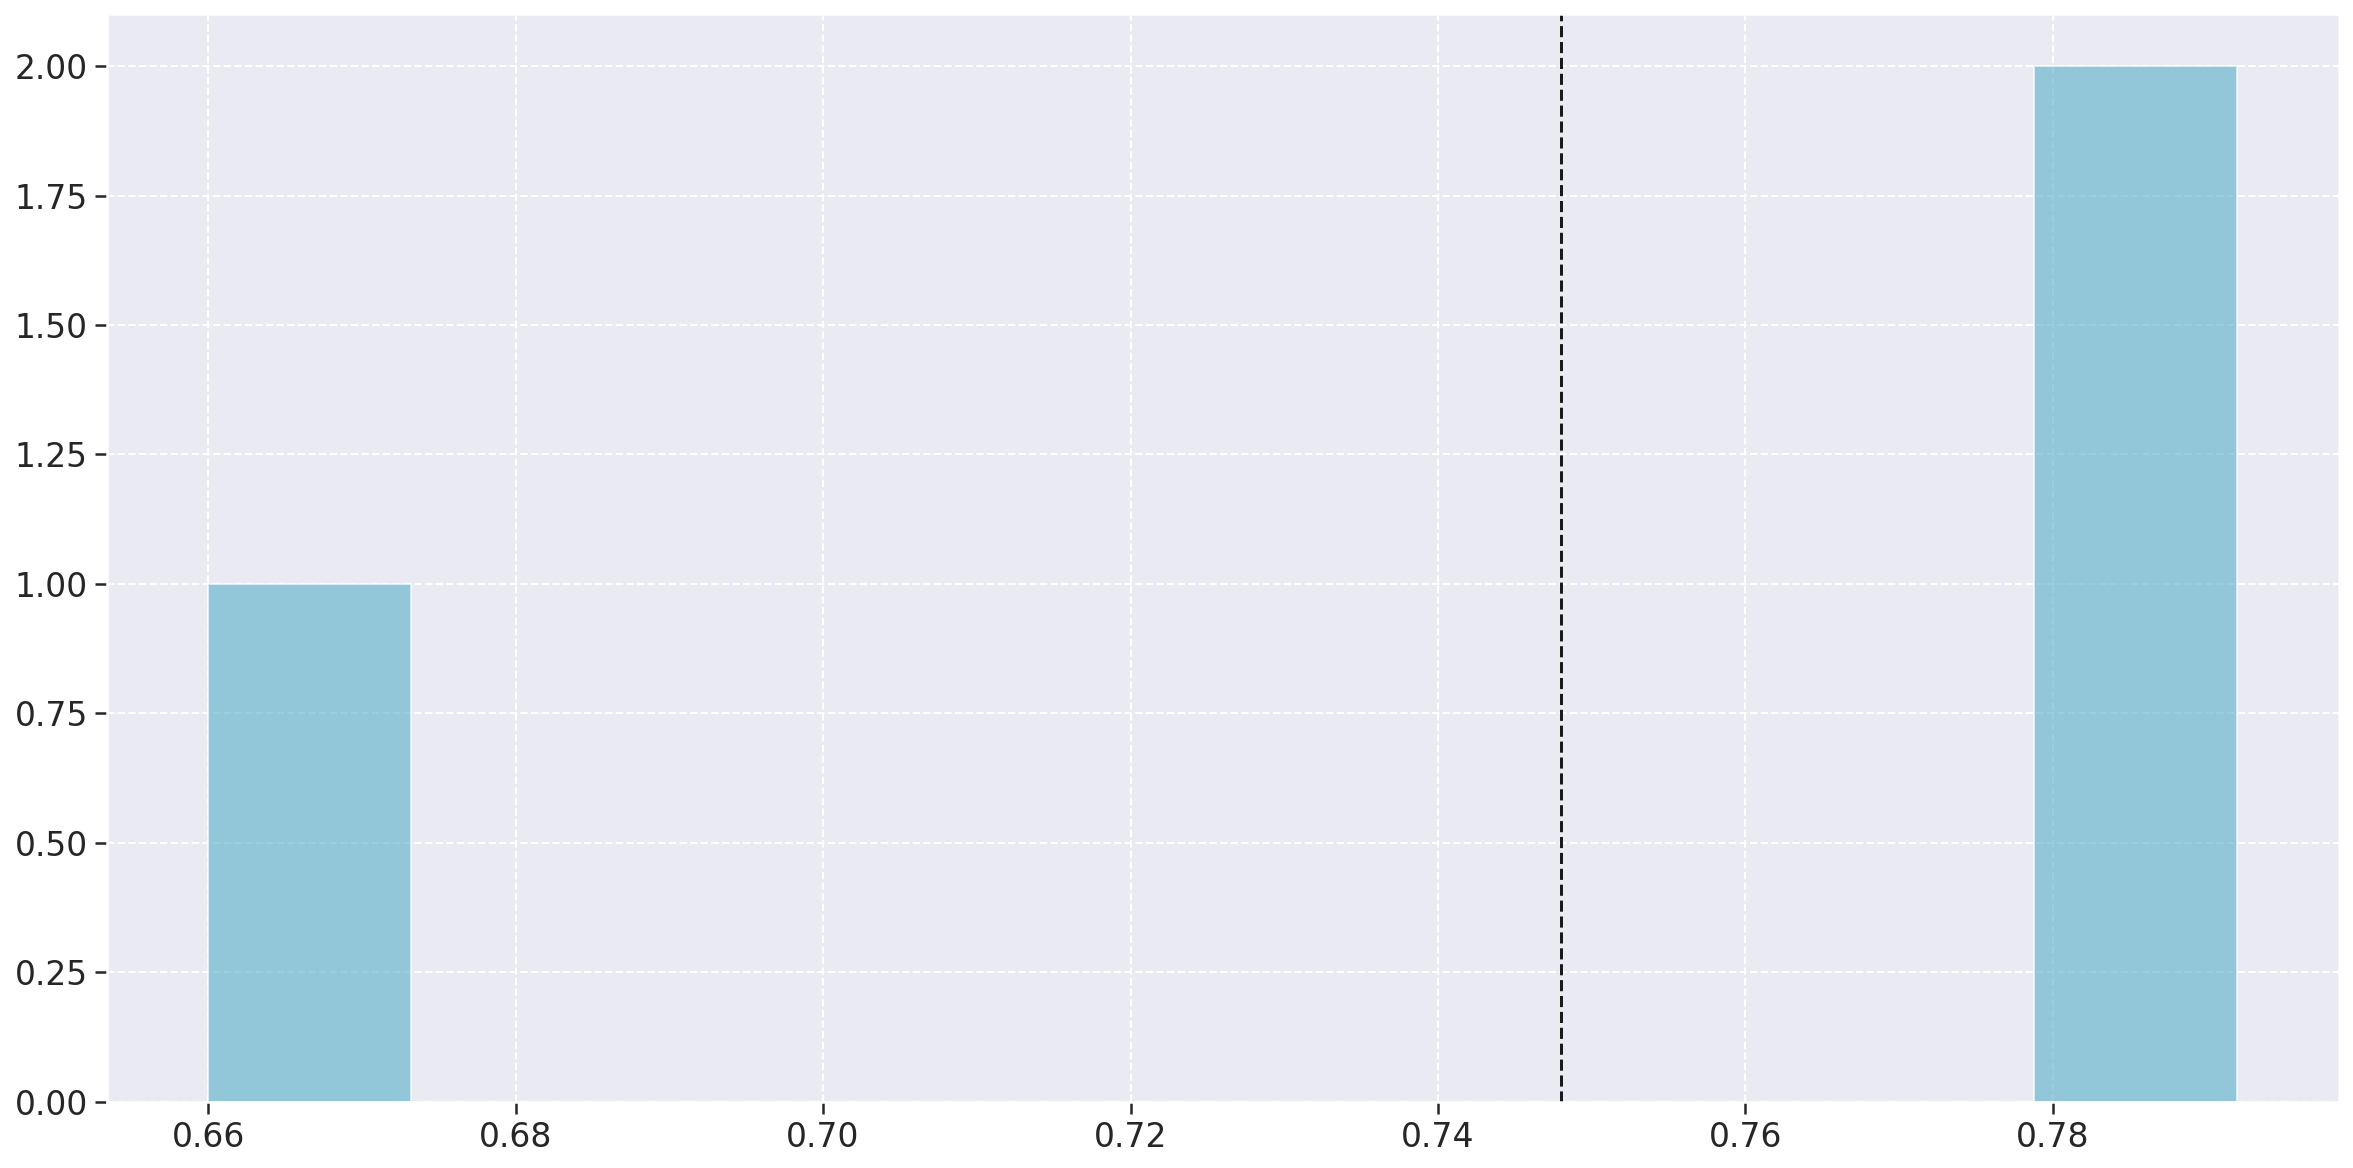

In [82]:
fig = plt.figure(figsize=(20, 10))

plt.hist(archives_metrics['code_quality'], bins=10, color='c', alpha=0.65)
plt.axvline(archives_metrics['code_quality'].mean(), color='k', linestyle='dashed')

### Testing Status

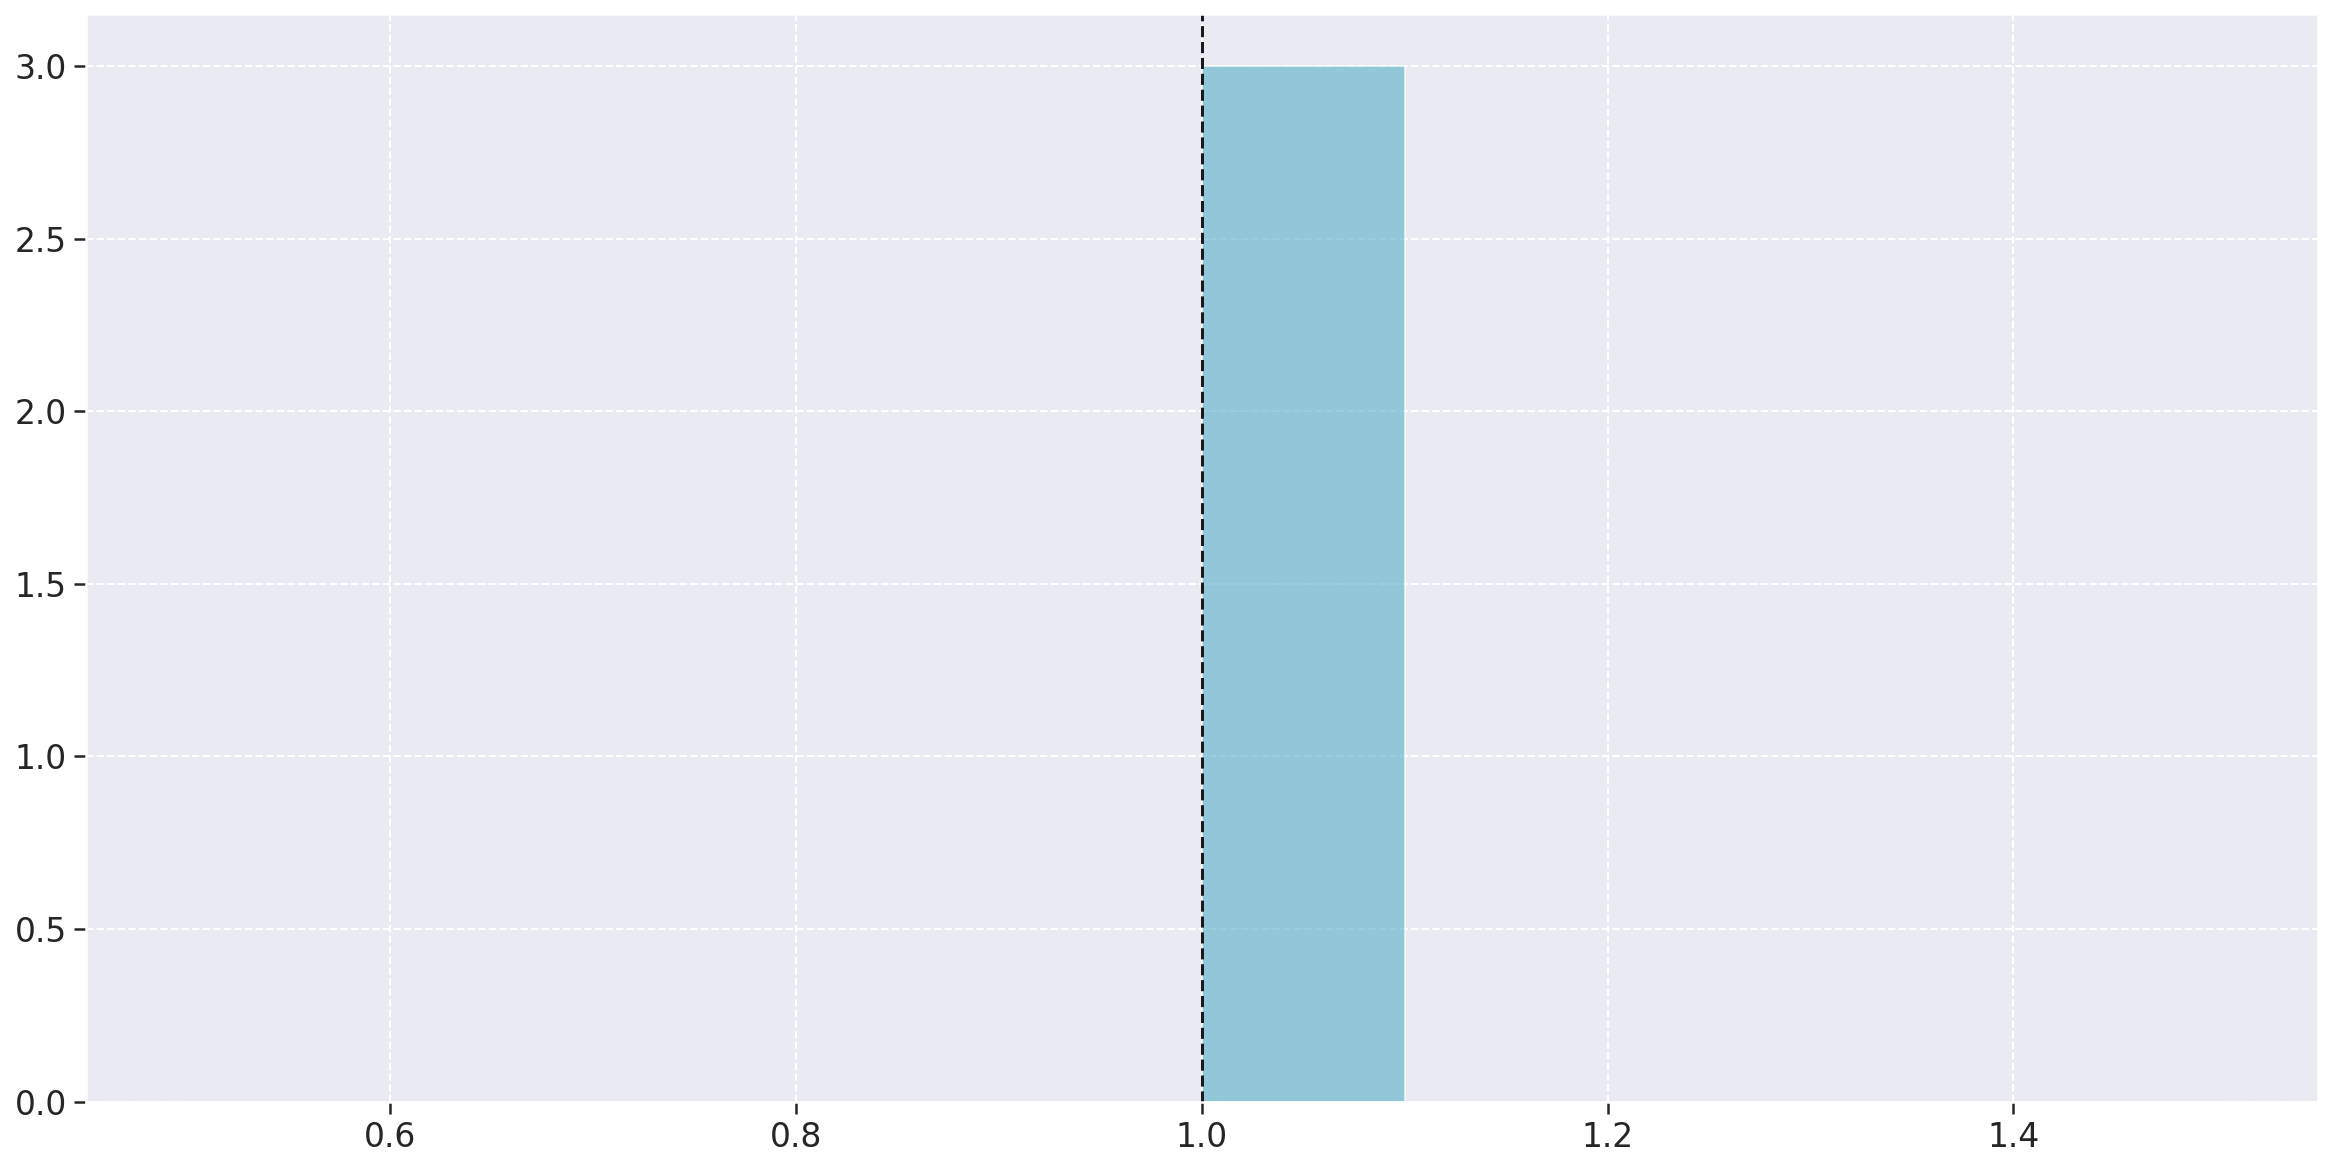

In [83]:
fig = plt.figure(figsize=(20, 10))

plt.hist(archives_metrics['testing_status'], bins=10, color='c', alpha=0.65)
plt.axvline(archives_metrics['testing_status'].mean(), color='k', linestyle='dashed')

## Boxplot

### Code Quality

{'whiskers': [<matplotlib.lines.Line2D at 0x7f684efea898>,
 'caps': [<matplotlib.lines.Line2D at 0x7f684efeae48>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f684efea7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f684eff8438>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f684eff8710>],
 'means': []}

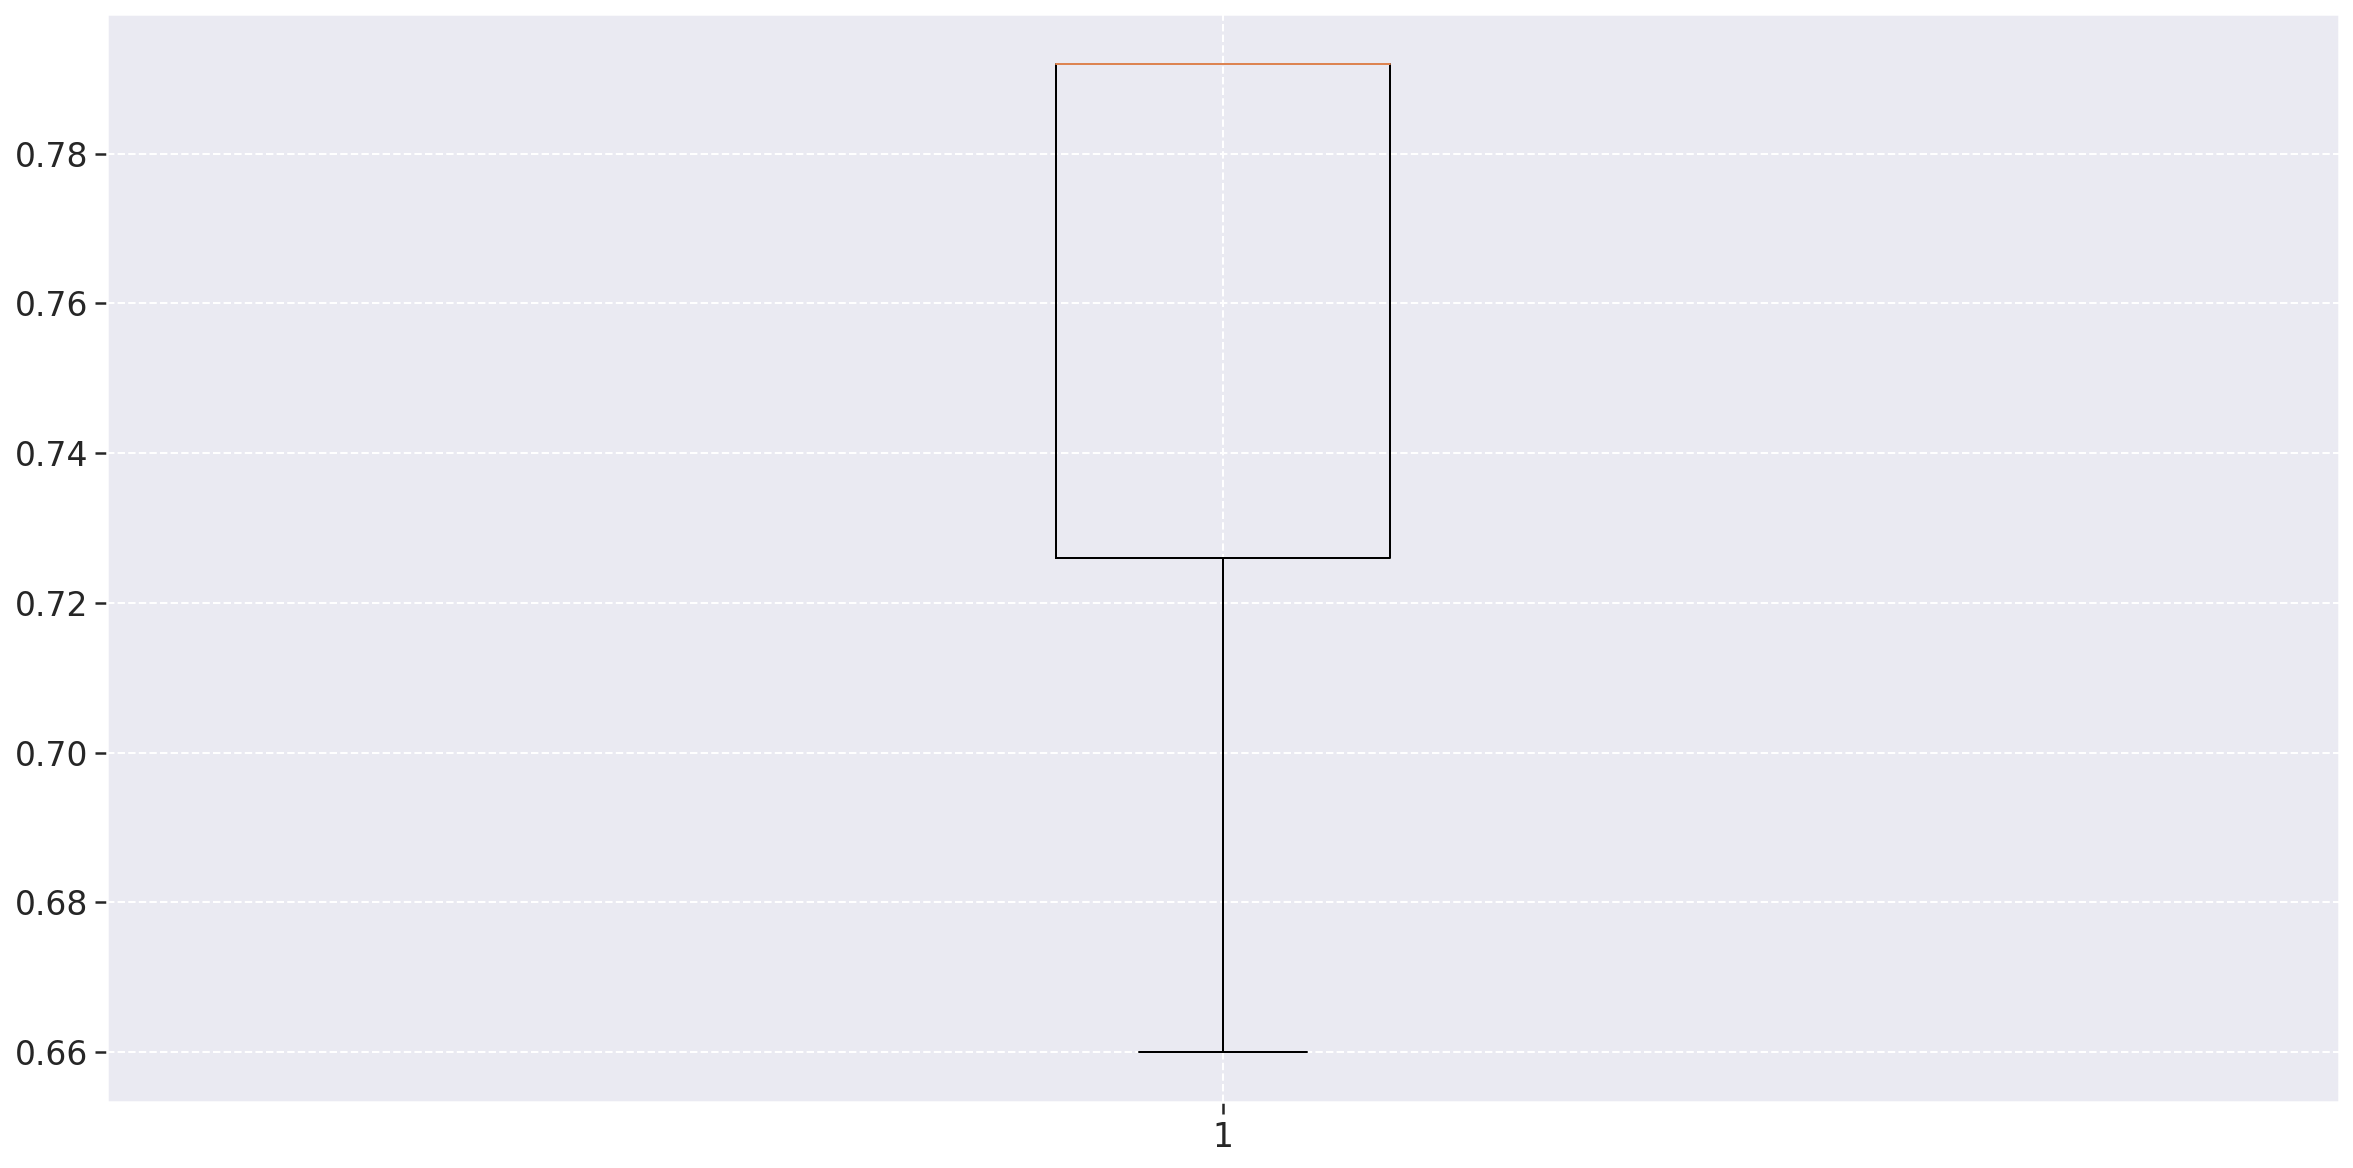

In [84]:
fig = plt.figure(figsize=(20, 10))

plt.boxplot(archives_metrics['code_quality'])

### Testing Status

{'whiskers': [<matplotlib.lines.Line2D at 0x7f684ef52eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f684ef5f4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f684ef52e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f684ef5fa58>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f684ef5fd30>],
 'means': []}

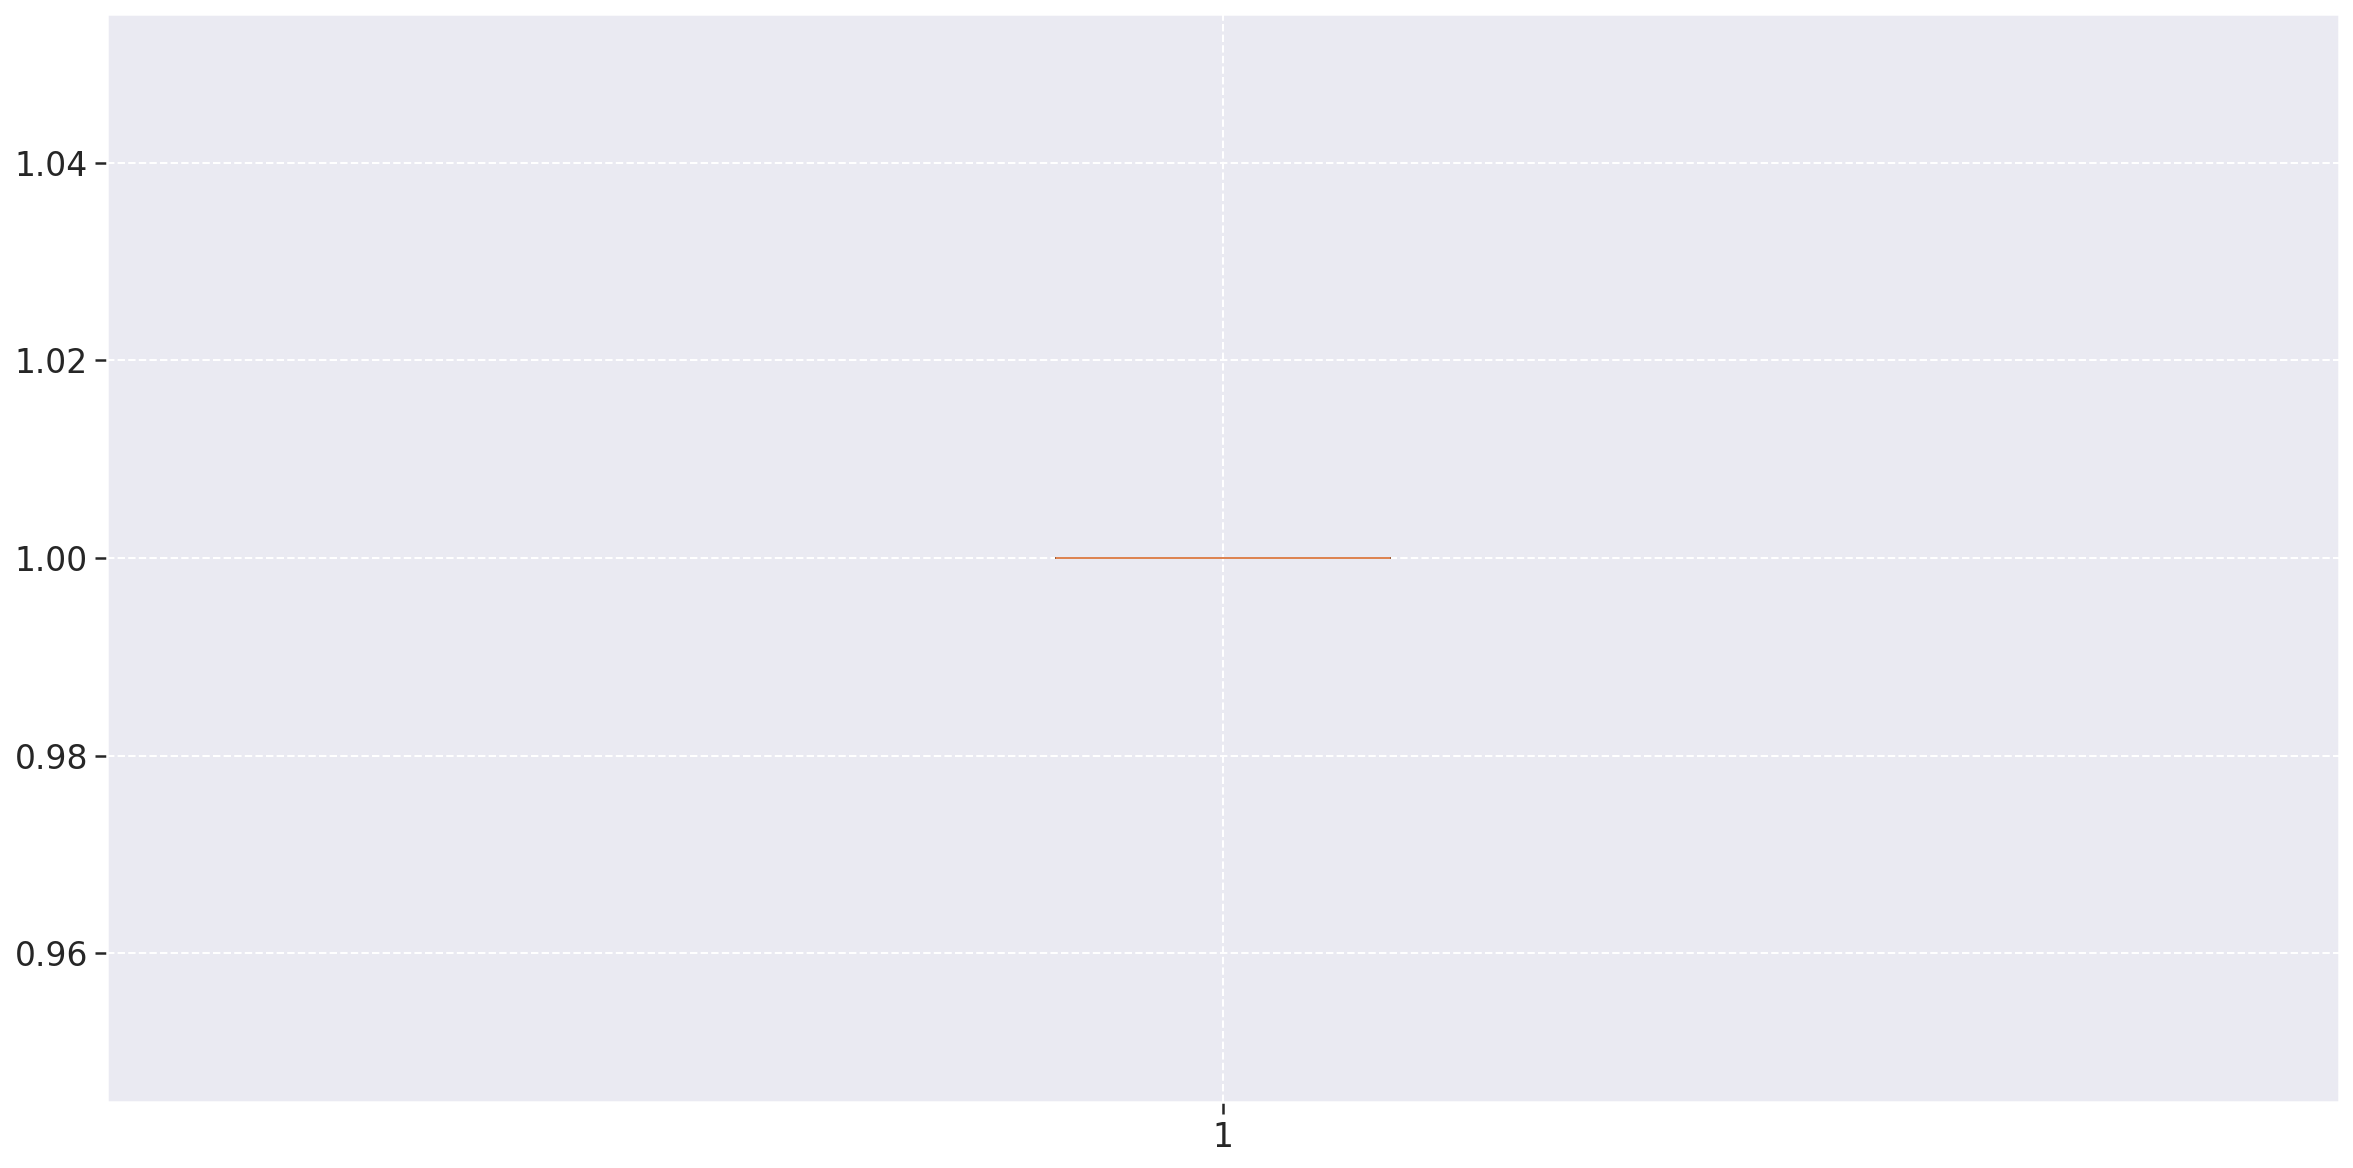

In [85]:
fig = plt.figure(figsize=(20, 10))

plt.boxplot(archives_metrics['testing_status'])

## Analysis

### Code Quality

It's possible to see at the **boxplot** that the range of the metric is not that big, having a min close to .6 and a max close to .775, and the median is, basically, at the third quartile.
But we can also see that the metric wich decreased the total value is m1, wich means the code now has a pretty complex file.
We can see at the **histogram** that in 2 releases the repository got the same value for the metric, but it decreased as we see in the dataframe.

### Testing Status

All of the testing status values where 1 after discarding unnecessary files to be tested (setup files) as we can see in the single line **boxplot** and single column **histogram**

# Profile

In [86]:
profile_metrics

,m1,m2,m3,m4,m6,repository,version,ncloc,code_quality,testing_status
0,1.0,0.4,1.0,1.0,1.0,Profile,03-10-2021-15-48,112,0.792,1.0
1,1.0,0.4,1.0,1.0,1.0,Profile,13-09-2021-14-00,112,0.792,1.0


## Histograms

### Code Quality

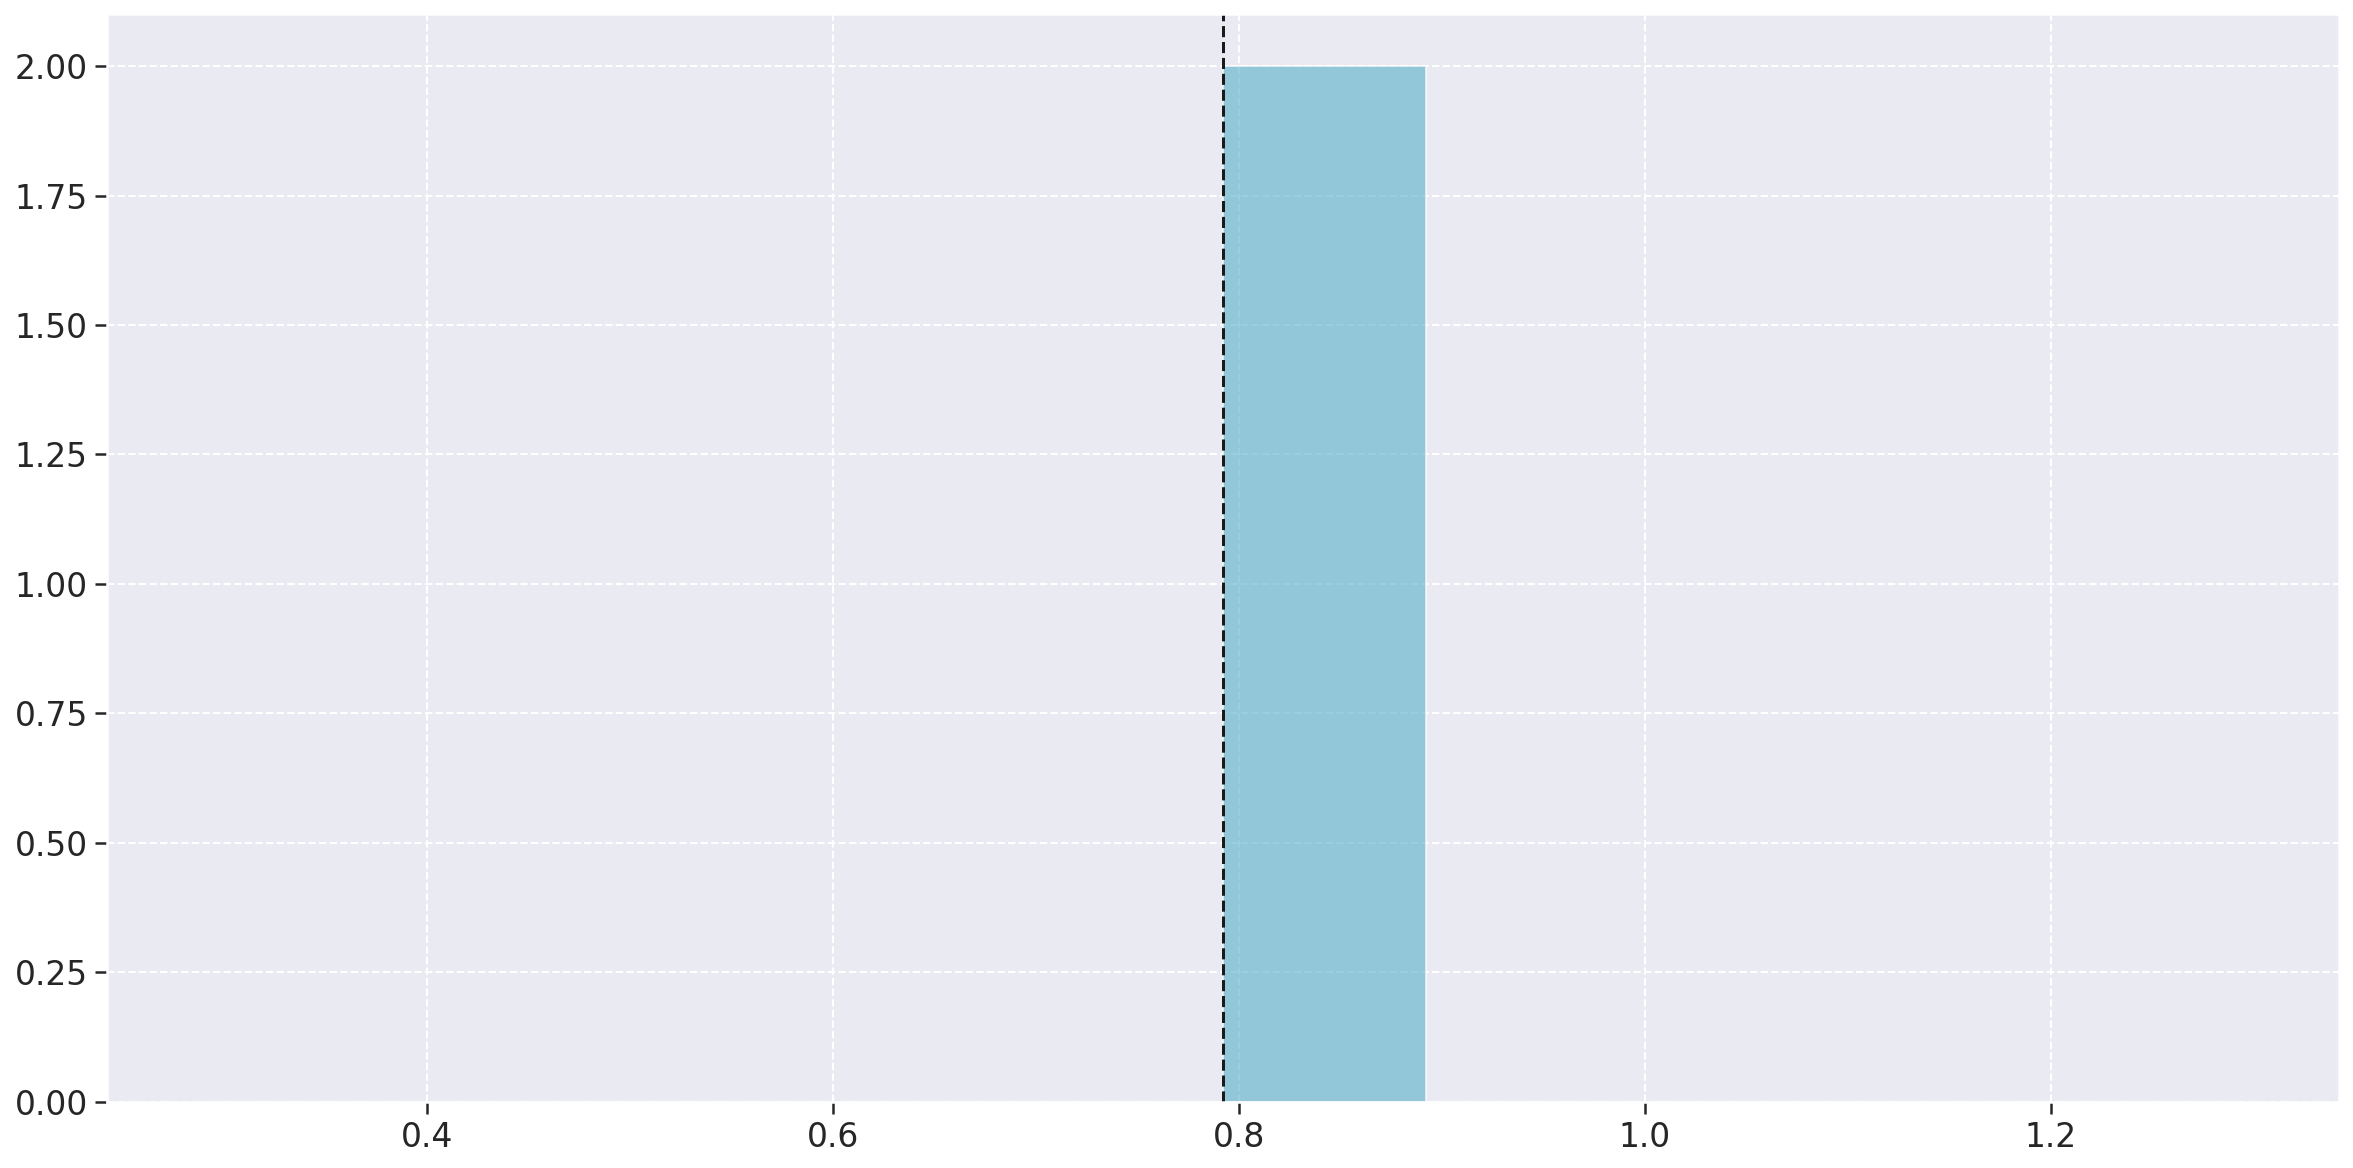

In [87]:
fig = plt.figure(figsize=(20, 10))

plt.hist(profile_metrics['code_quality'], bins=10, color='c', alpha=0.65)
plt.axvline(profile_metrics['code_quality'].mean(), color='k', linestyle='dashed')

### Testing Status

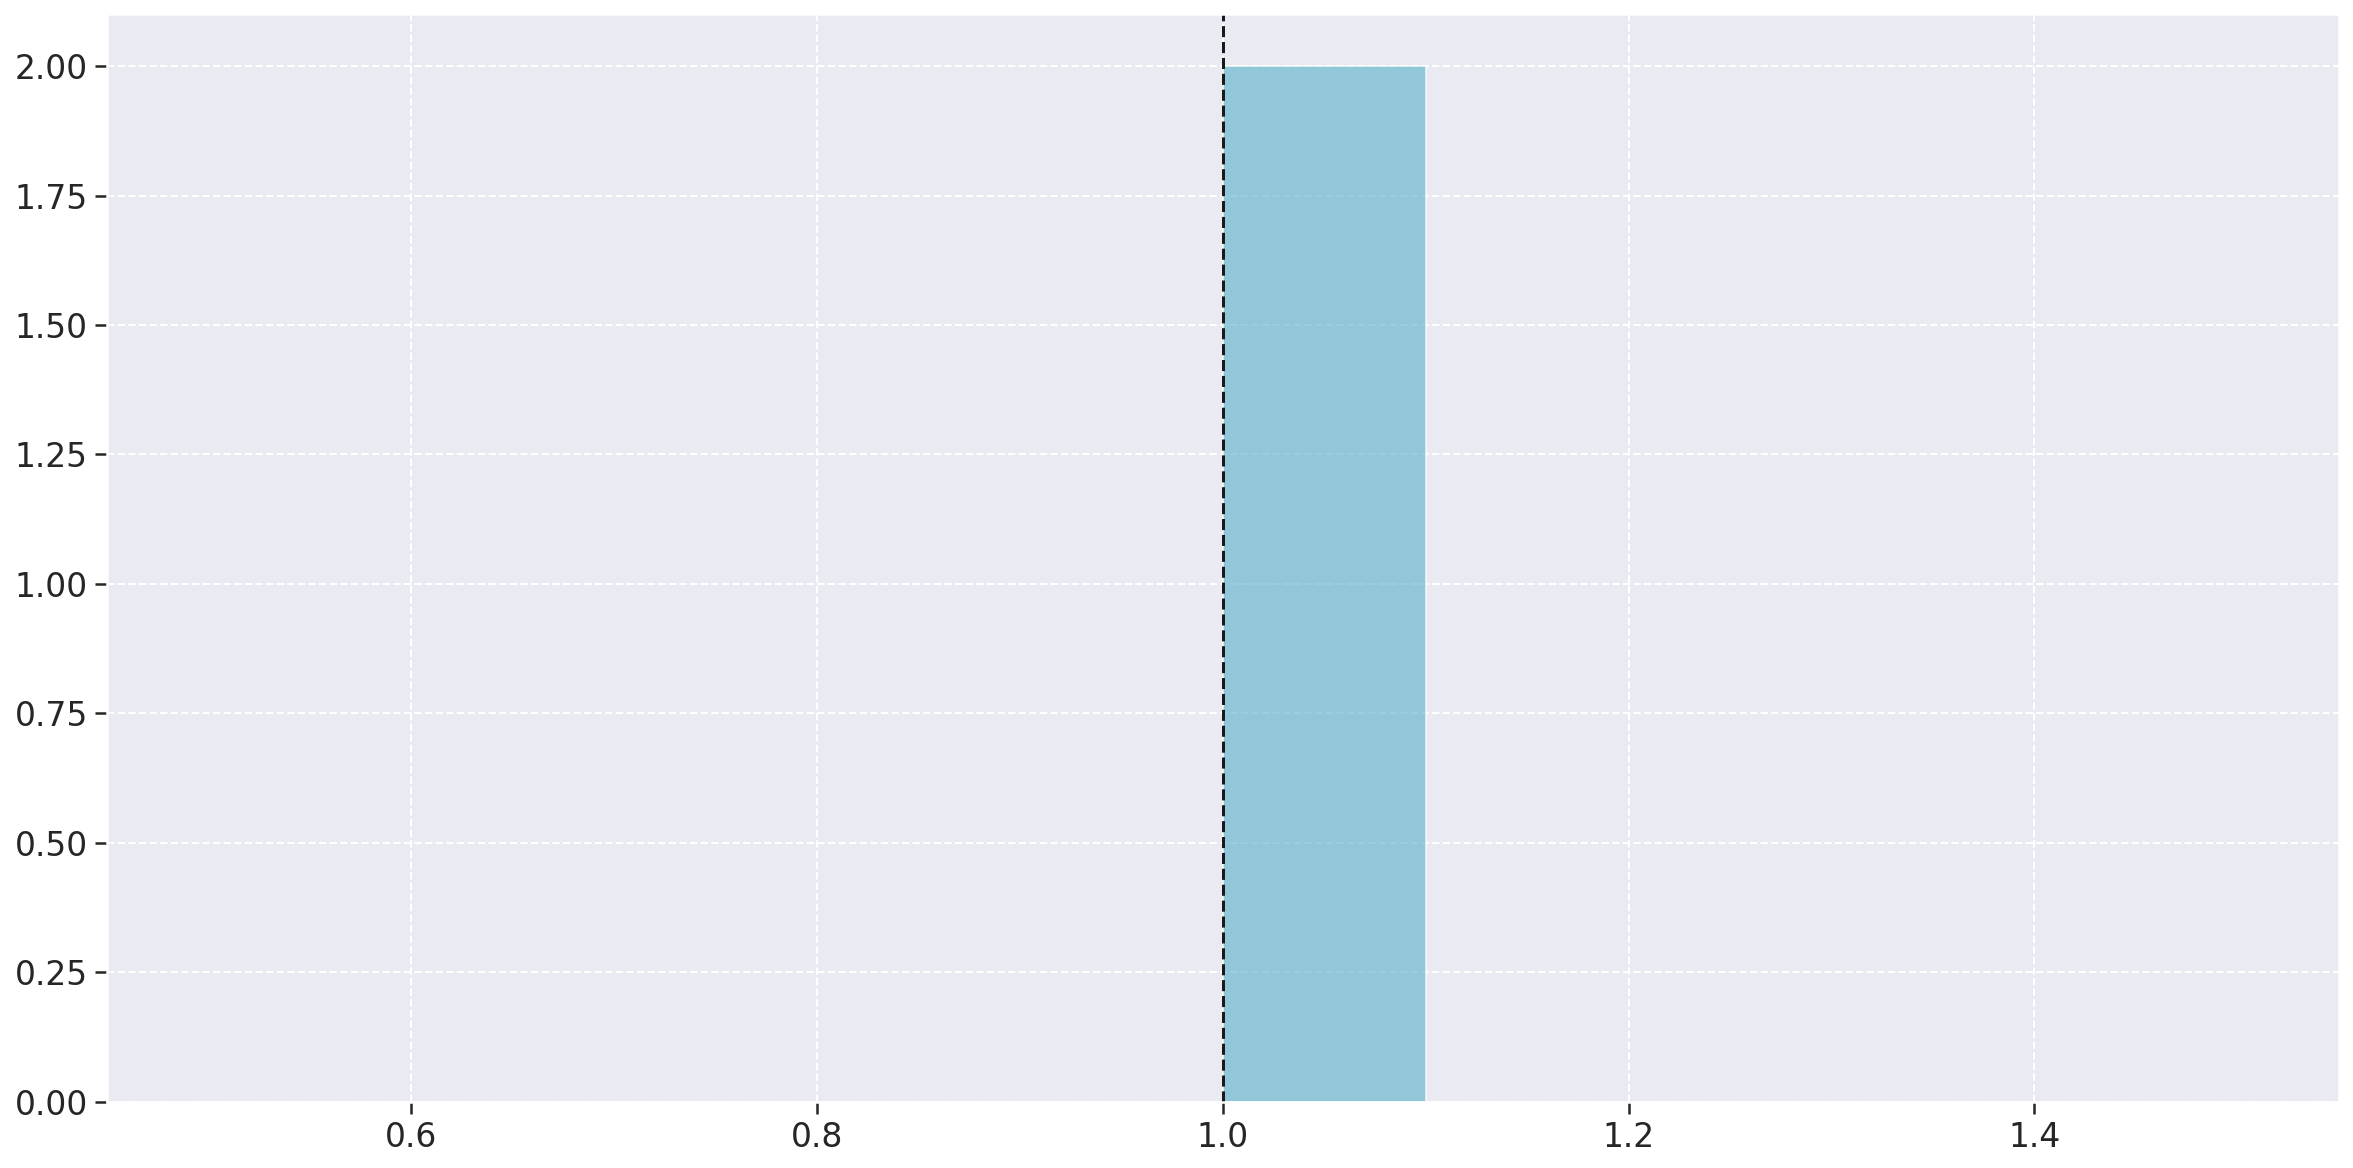

In [88]:
fig = plt.figure(figsize=(20, 10))

plt.hist(profile_metrics['testing_status'], bins=10, color='c', alpha=0.65)
plt.axvline(profile_metrics['testing_status'].mean(), color='k', linestyle='dashed')

## Boxplot

### Code Quality

{'whiskers': [<matplotlib.lines.Line2D at 0x7f684edde208>,
 'caps': [<matplotlib.lines.Line2D at 0x7f684edde7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f684edde160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f684eddeda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f684ede90b8>],
 'means': []}

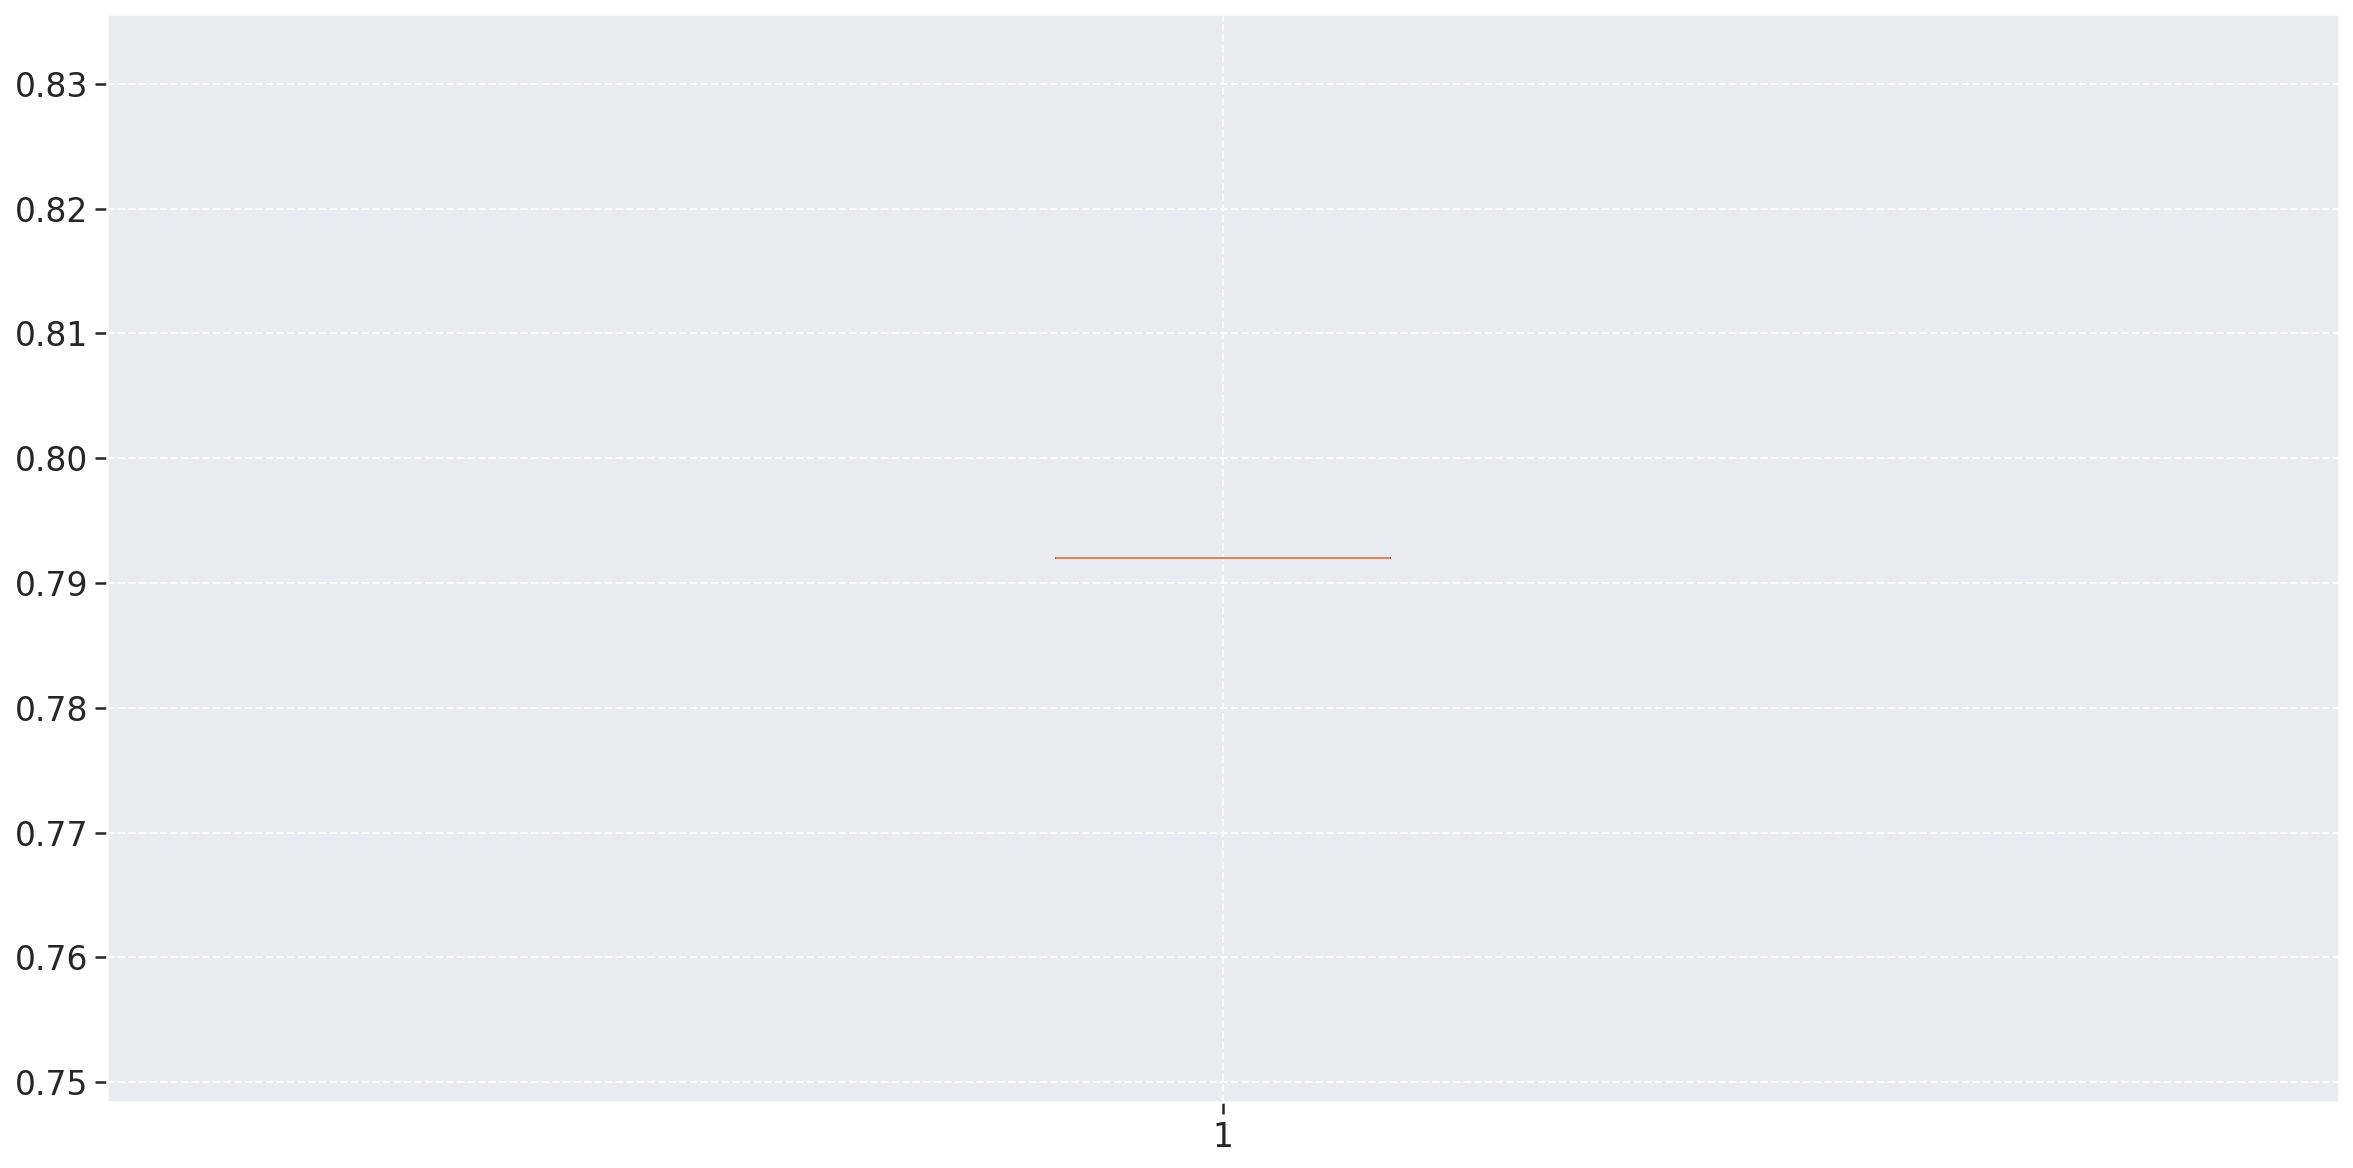

In [89]:
fig = plt.figure(figsize=(20, 10))

plt.boxplot(profile_metrics['code_quality'])

### Testing Status

{'whiskers': [<matplotlib.lines.Line2D at 0x7f684edc3b38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f684ed51160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f684edc3a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f684ed51710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f684ed519e8>],
 'means': []}

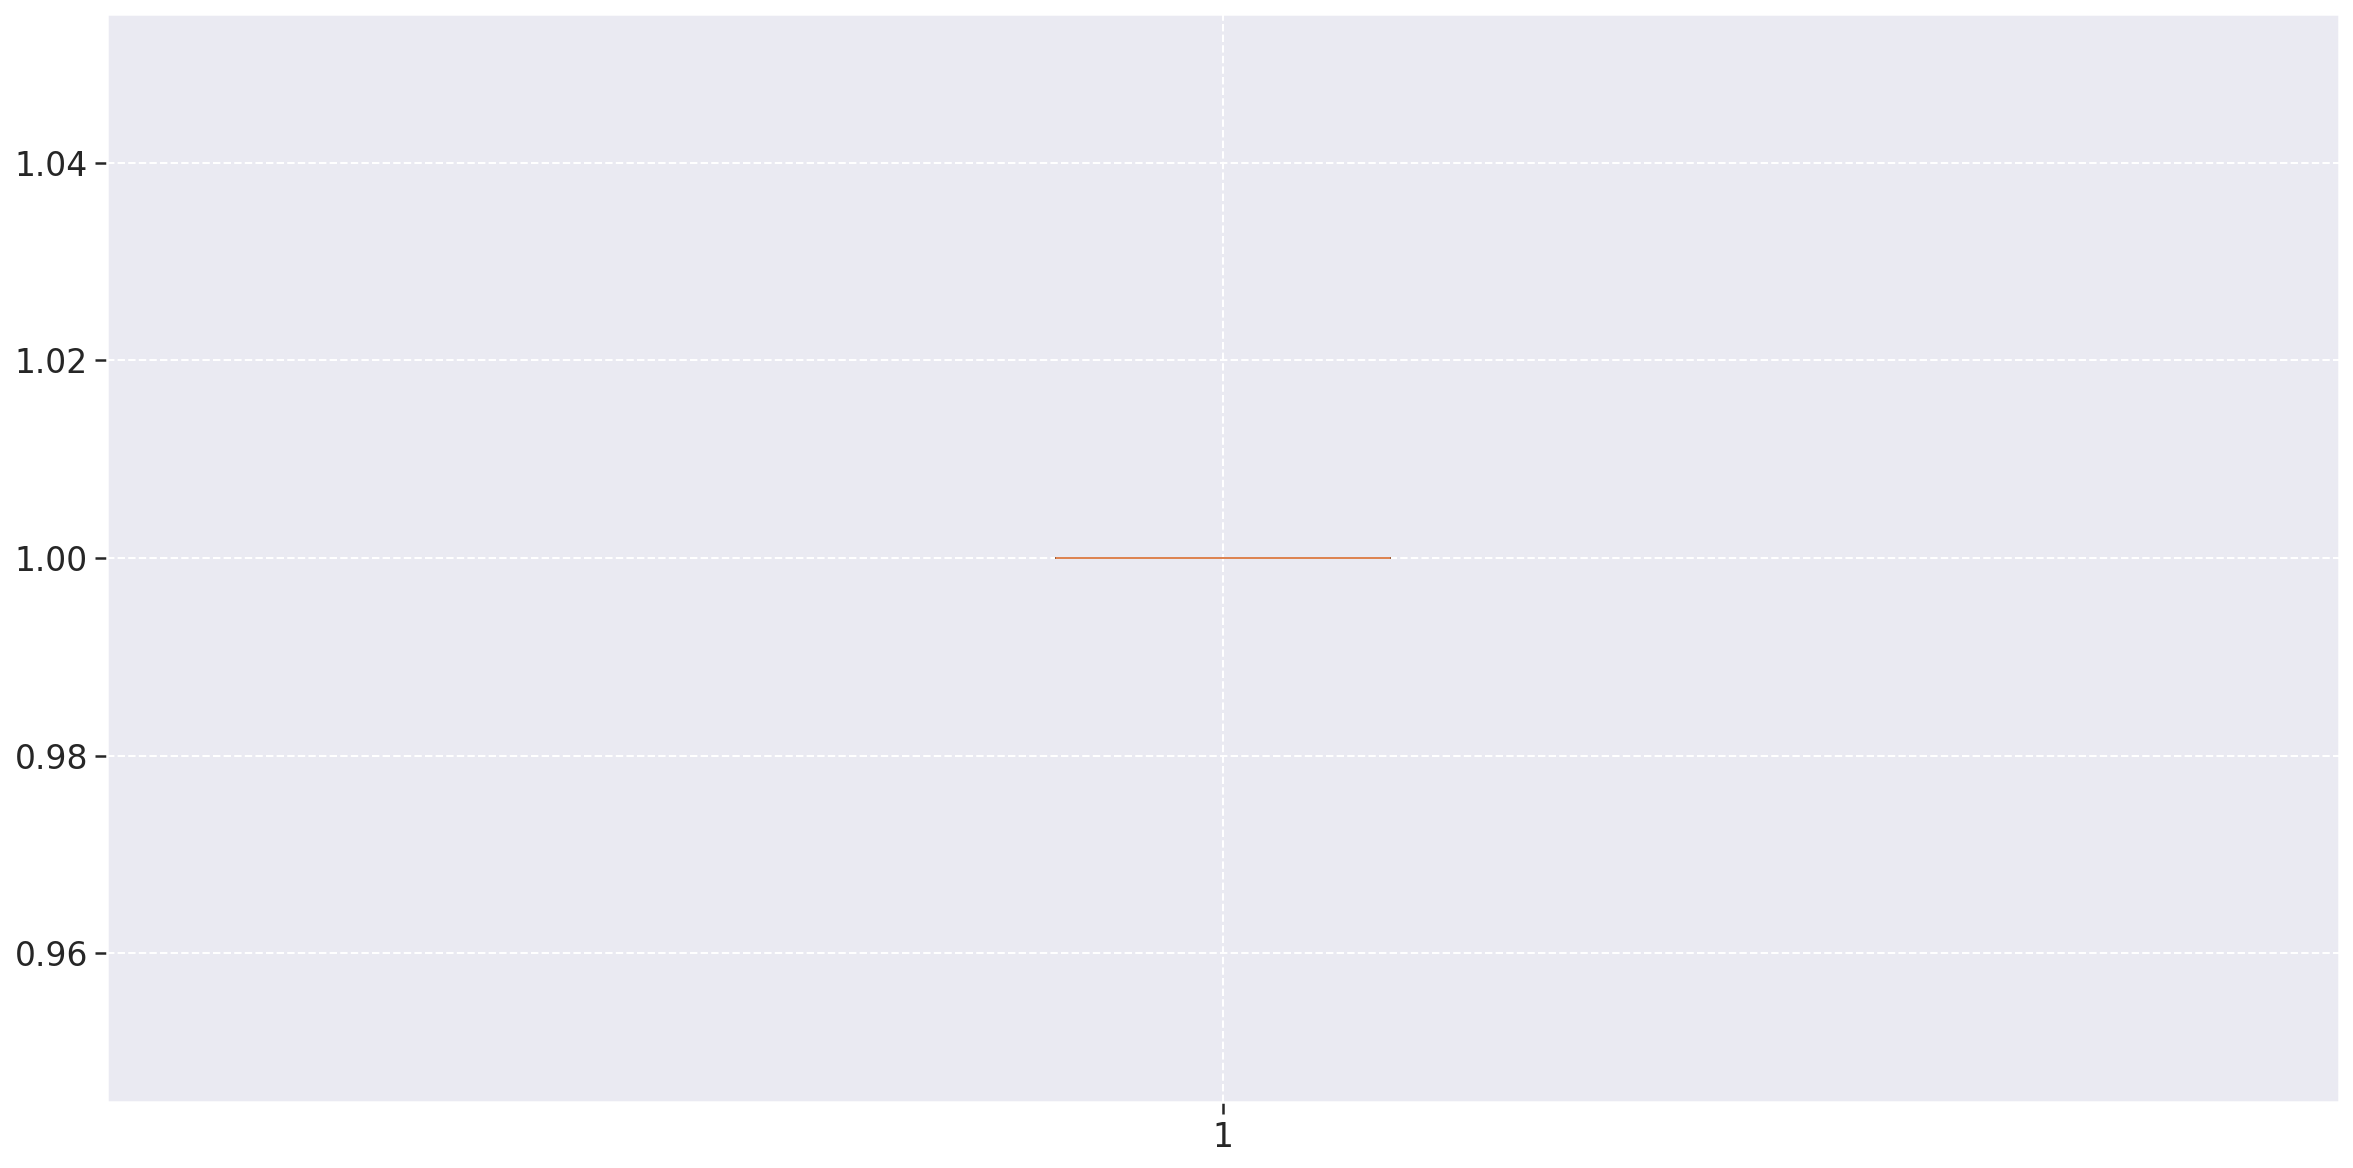

In [90]:
fig = plt.figure(figsize=(20, 10))

plt.boxplot(profile_metrics['testing_status'])

## Analysis

### Code Quality

We can see at the **histogram** (only has one column) and **boxplot** (a single line boxplot) graphs that both of the releases, R1 and MVP, have the same code quality value, so it's safe to assume that the new code hasn't affected the code quality at all.

### Testing Status

Just like the metric above, the testing status metric hasn't changed at all at the **histogram** and **boxplot** graphs.

# Frontend

In [93]:
frontend_metrics

,m1,m2,m3,m4,m6,repository,version,ncloc,code_quality,testing_status
0,0.909091,0.045455,1.000000,1.0,1.000000,Frontend,03-10-2021-15-49,1401,0.645000,1.000000
1,0.959184,0.020408,0.918367,1.0,0.938776,Frontend,03-11-2021-02-08,4888,0.626327,0.957143
2,0.500000,0.500000,1.000000,1.0,1.000000,Frontend,13-09-2021-20-00,35,0.660000,1.000000
3,0.959184,0.020408,0.918367,1.0,0.959184,Frontend,17-10-2021-15-30,4858,0.626327,0.971429


## Histograms

### Code Quality

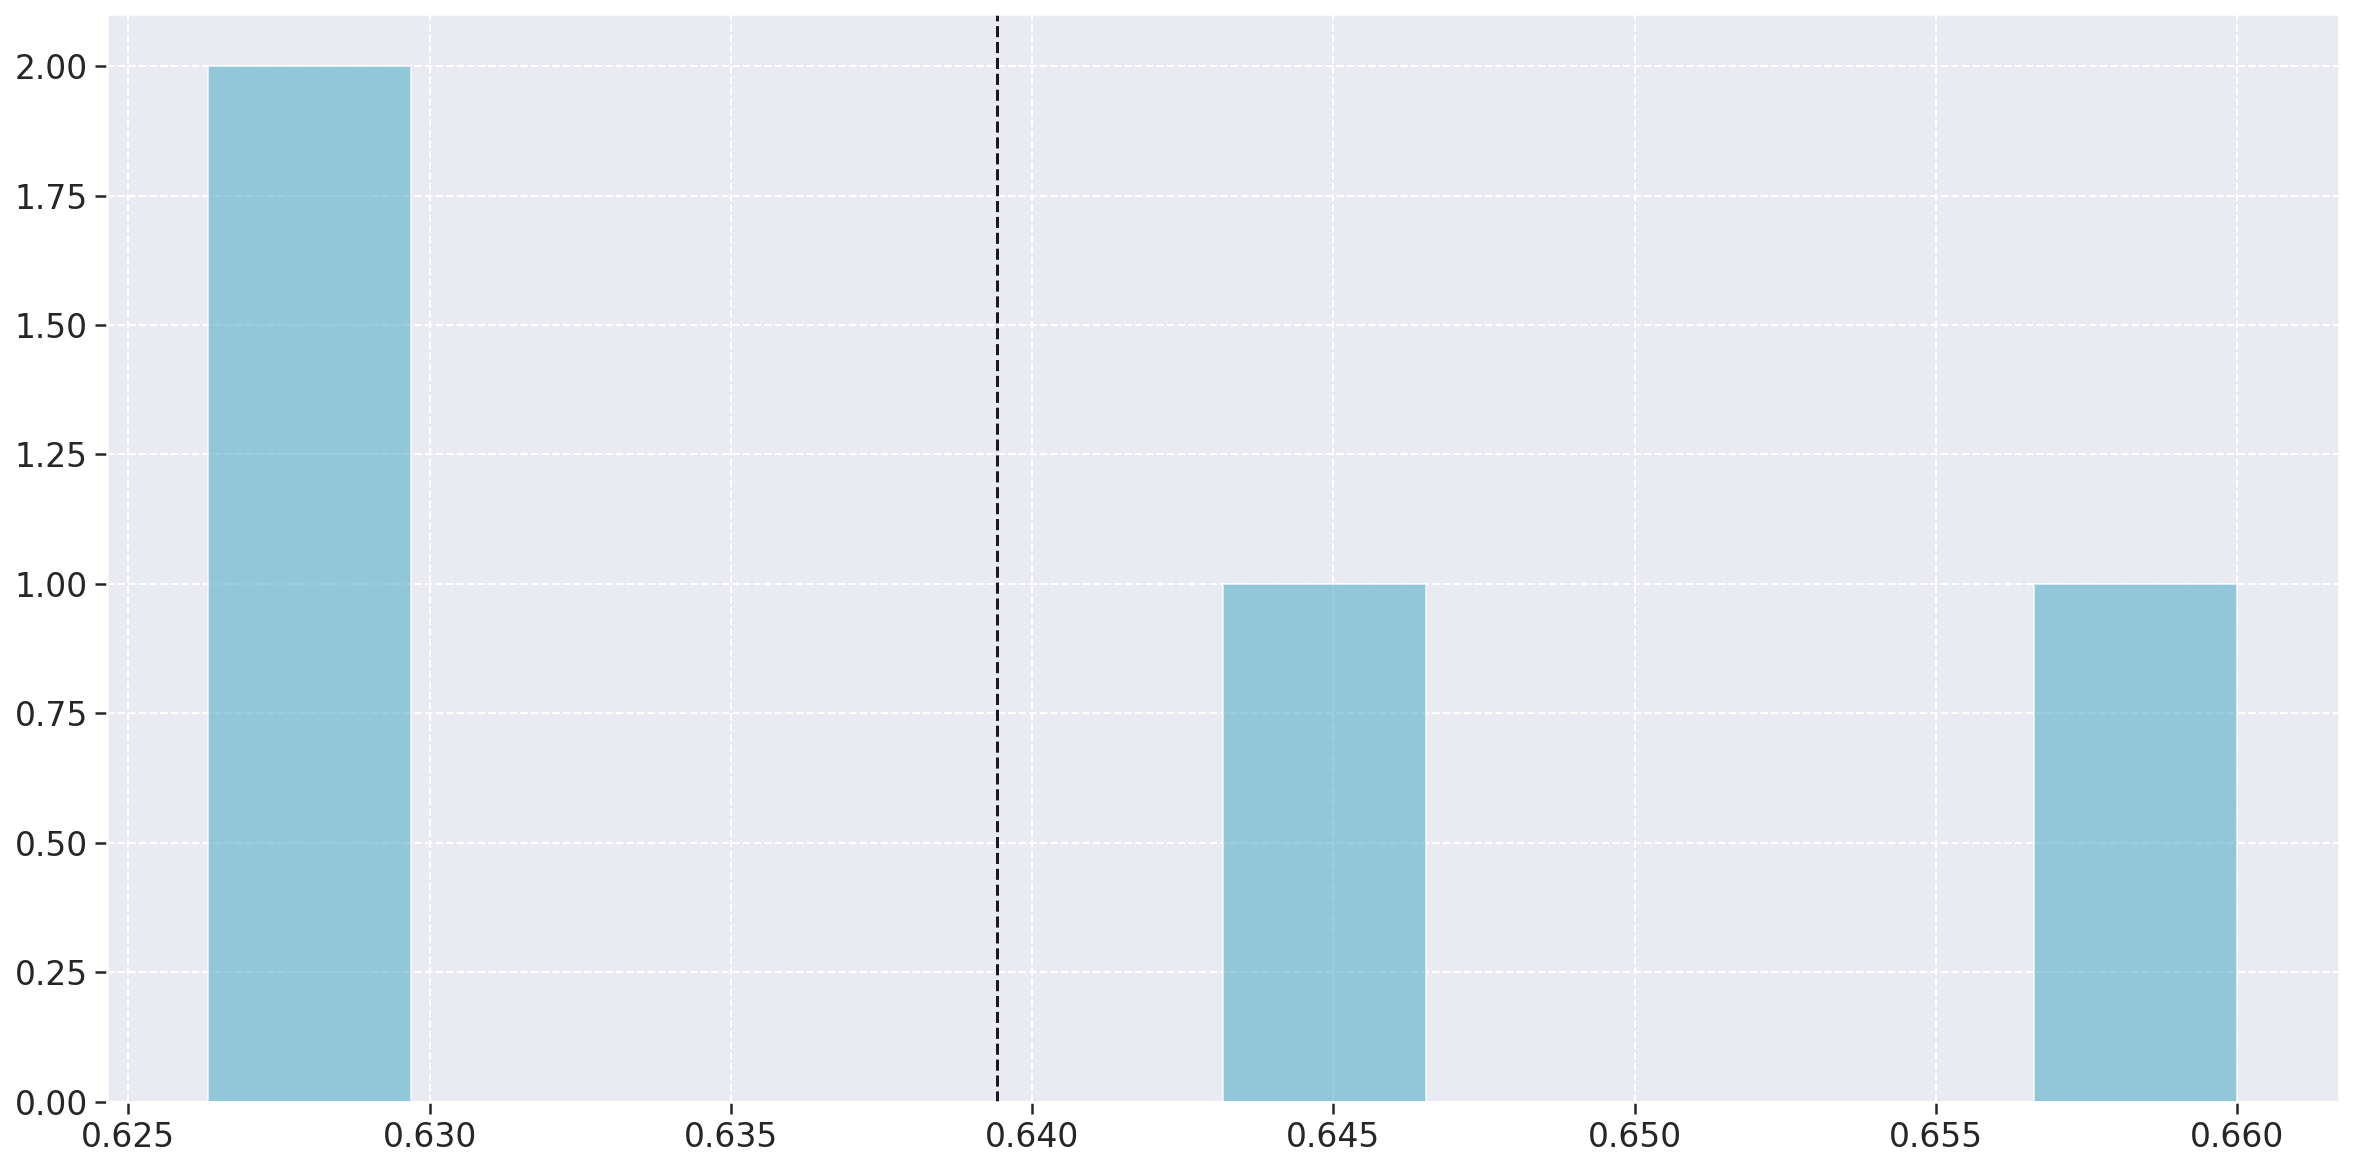

In [94]:
fig = plt.figure(figsize=(20, 10))

plt.hist(frontend_metrics['code_quality'], bins=10, color='c', alpha=0.65)
plt.axvline(frontend_metrics['code_quality'].mean(), color='k', linestyle='dashed')

### Testing Status

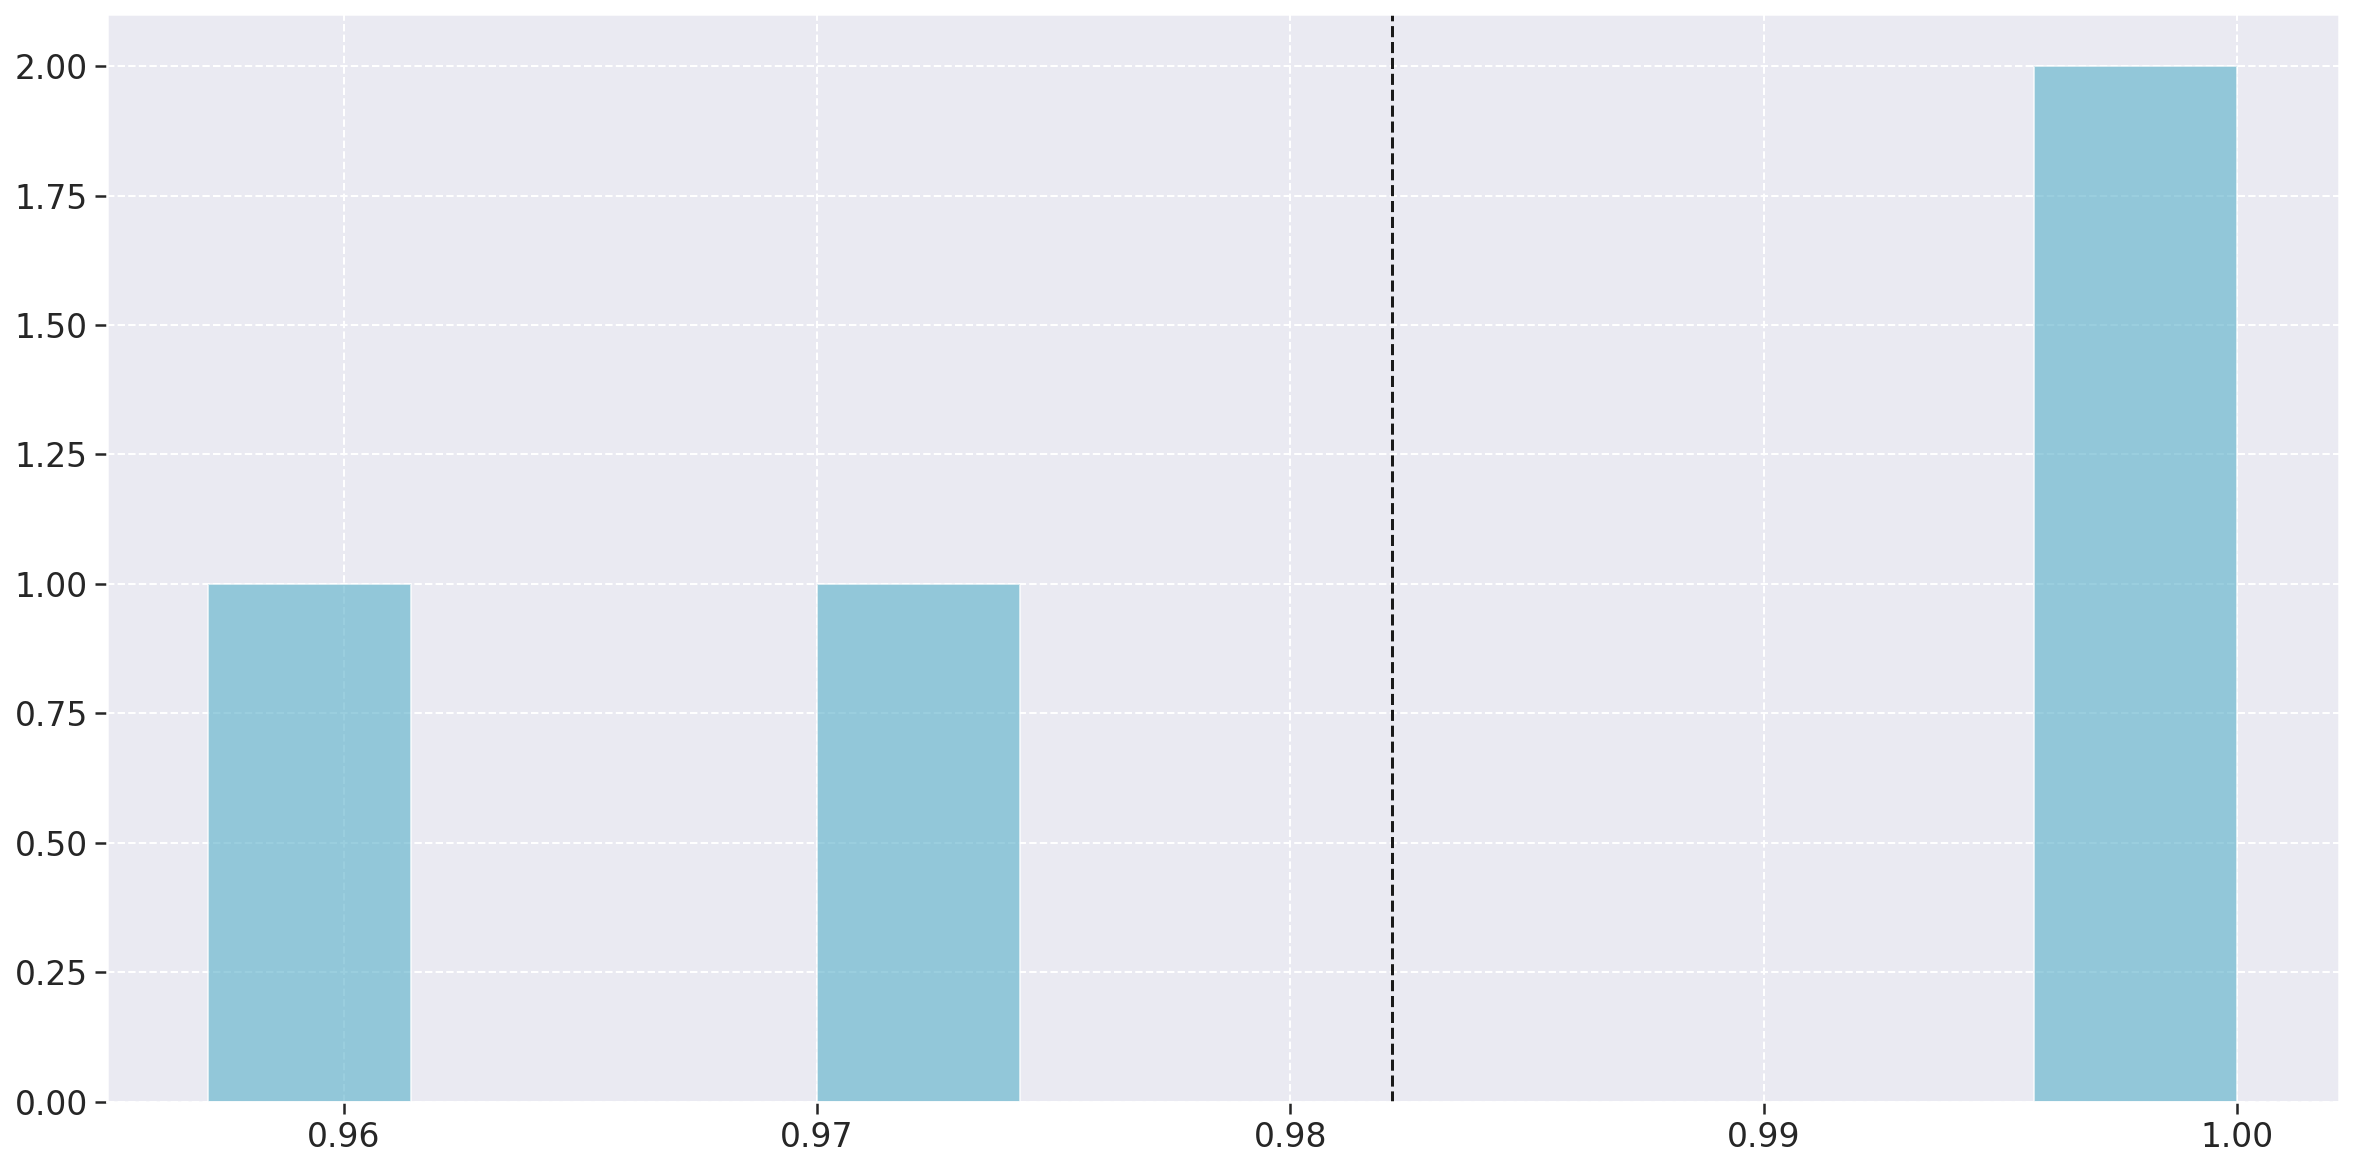

In [95]:
fig = plt.figure(figsize=(20, 10))

plt.hist(frontend_metrics['testing_status'], bins=10, color='c', alpha=0.65)
plt.axvline(frontend_metrics['testing_status'].mean(), color='k', linestyle='dashed')

## Boxplot

### Code Quality

{'whiskers': [<matplotlib.lines.Line2D at 0x7f684ec4d518>,
 'caps': [<matplotlib.lines.Line2D at 0x7f684ec4dac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f684ec4d470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f684ebda0f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f684ebda3c8>],
 'means': []}

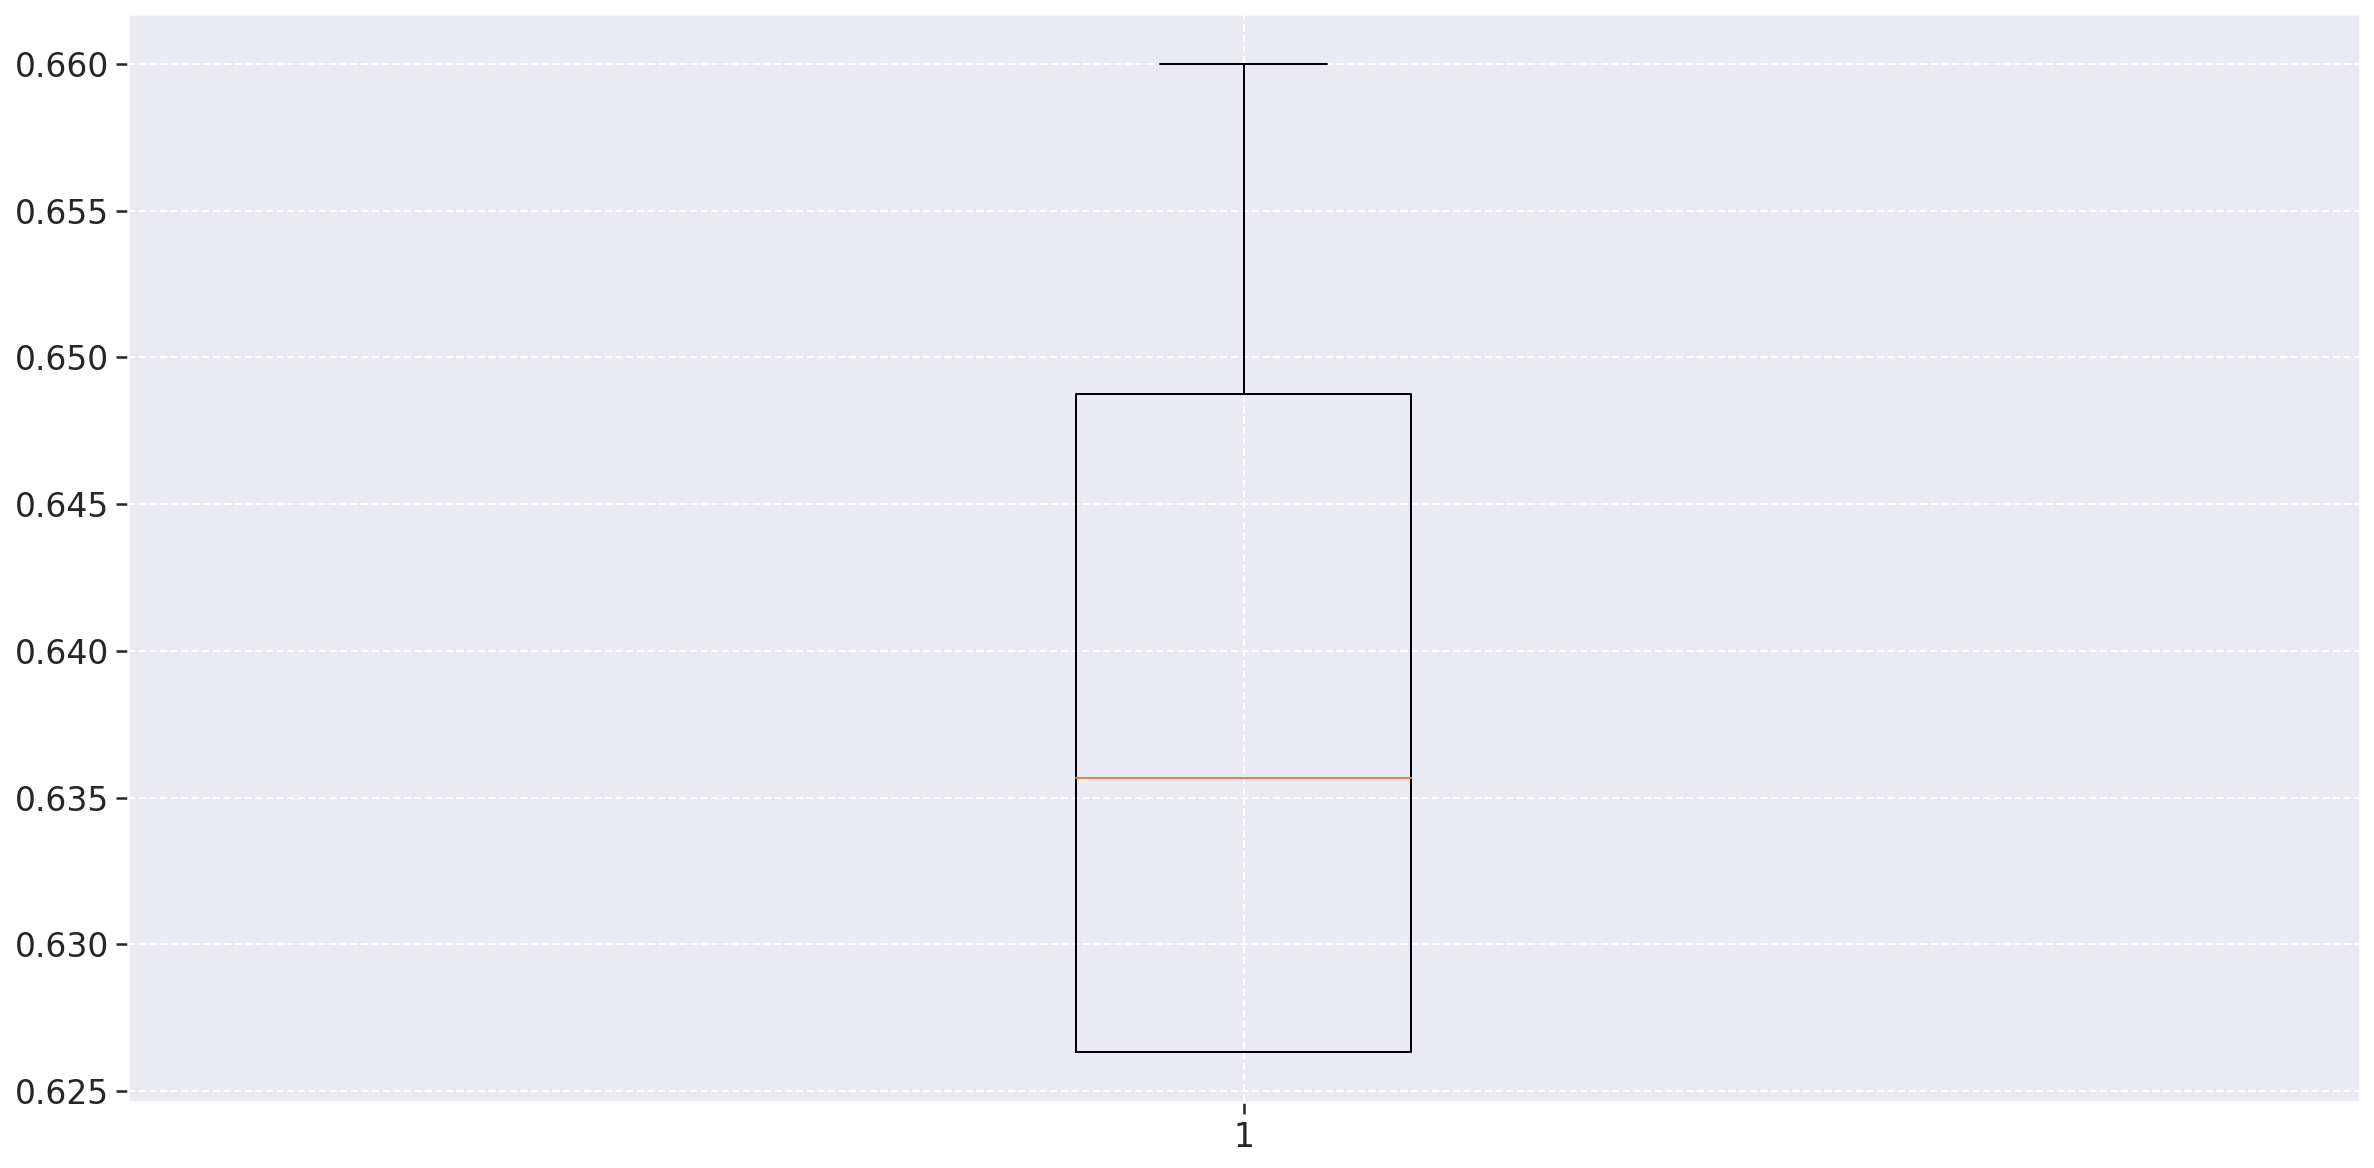

In [96]:
fig = plt.figure(figsize=(20, 10))

plt.boxplot(frontend_metrics['code_quality'])

### Testing Status

{'whiskers': [<matplotlib.lines.Line2D at 0x7f684ebb77f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f684ebb7dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f684ebb7748>],
 'medians': [<matplotlib.lines.Line2D at 0x7f684ebc83c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f684ebc86a0>],
 'means': []}

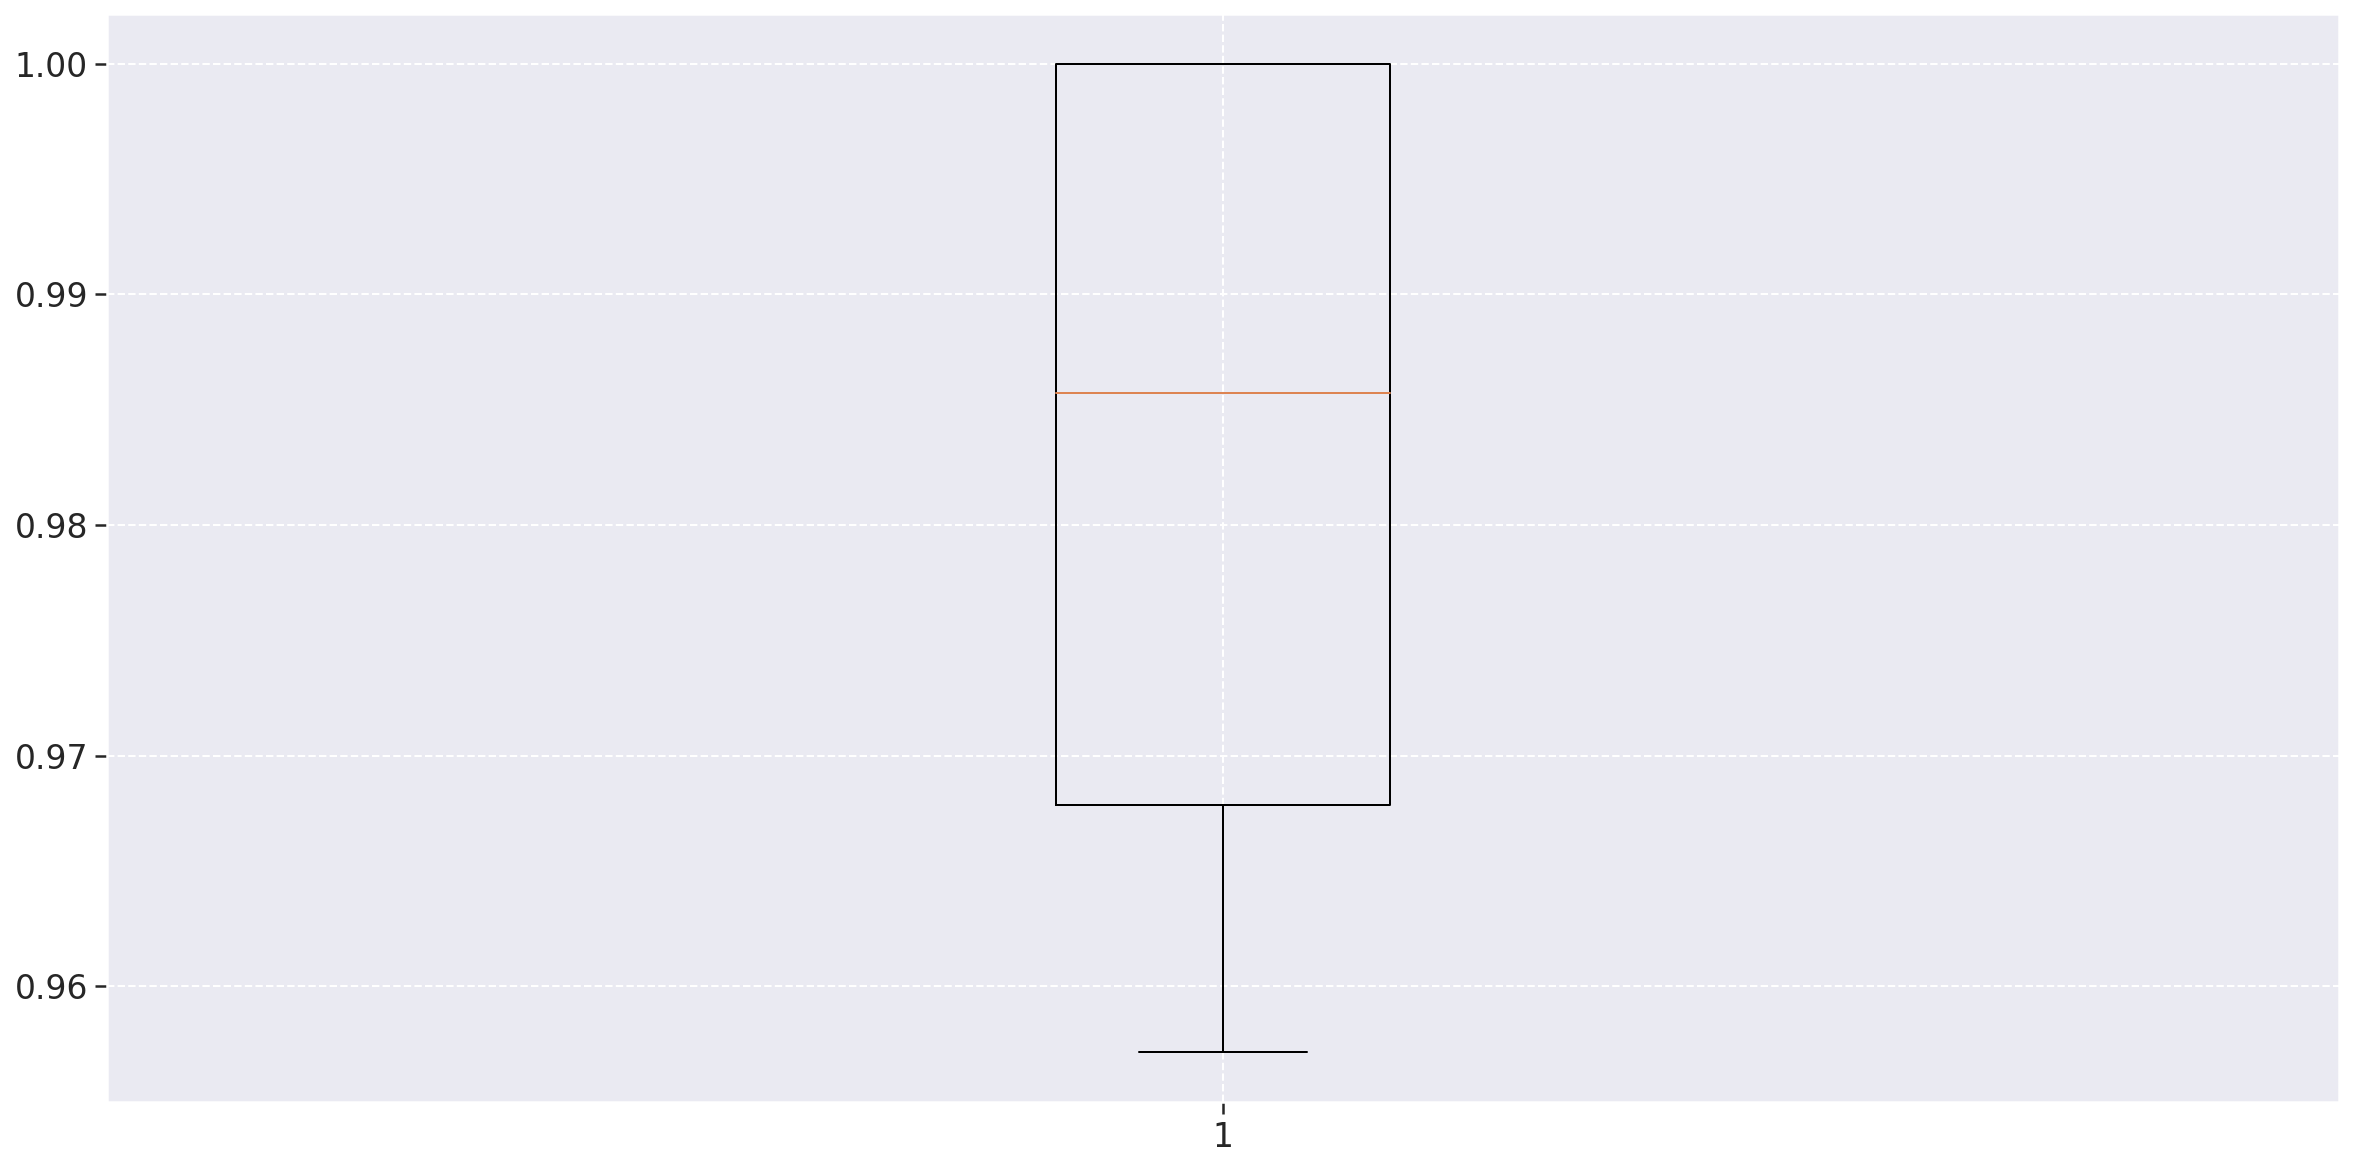

In [97]:
fig = plt.figure(figsize=(20, 10))

plt.boxplot(frontend_metrics['testing_status'])

## Analysis

### Code Quality

It's possible to see that the code quality metric didn't fluctuate much, as wee see at the **boxplot** y-axis and the **histogram** x-axis, being "compressed" between .625 and .660, and the 2 releases with the lowest value for the metric were the last two, meaning that the development couldn't maintain the code quality level.

### Testing Status

This metric hasn't changed much too, always close to 1, having the minimun value at almost .96, wich is really close to an optimun value.
The median and mean were also really close, one in the upper values between .98 and .99 and the other at the lower values of the same interval, so we can assume that the values were pretty high overall.

# Total Quality Aspect

In [101]:
metrics_df

,m1,m2,m3,m4,m6,repository,version,ncloc,code_quality,testing_status,maintainability,Reliability,total
0,1.000000,0.400000,1.000000,1.0,1.000000,Archives,03-10-2021-15-47,200,0.792000,1.000000,0.396000,0.500000,0.896000
1,0.428571,0.571429,1.000000,1.0,1.000000,Archives,03-11-2021-02-10,428,0.660000,1.000000,0.330000,0.500000,0.830000
2,1.000000,0.400000,1.000000,1.0,1.000000,Archives,13-09-2021-15-00,109,0.792000,1.000000,0.396000,0.500000,0.896000
3,1.000000,0.400000,1.000000,1.0,1.000000,Profile,03-10-2021-15-48,112,0.792000,1.000000,0.396000,0.500000,0.896000
4,1.000000,0.400000,1.000000,1.0,1.000000,Profile,13-09-2021-14-00,112,0.792000,1.000000,0.396000,0.500000,0.896000
5,0.909091,0.045455,1.000000,1.0,1.000000,Frontend,03-10-2021-15-49,1401,0.645000,1.000000,0.322500,0.500000,0.822500
6,0.959184,0.020408,0.918367,1.0,0.938776,Frontend,03-11-2021-02-08,4888,0.626327,0.957143,0.313163,0.478571,0.791735
7,0.500000,0.500000,1.000000,1.0,1.000000,Frontend,13-09-2021-20-00,35,0.660000,1.000000,0.330000,0.500000,0.830000
8,0.959184,0.020408,0.918367,1.0,0.959184,Frontend,17-10-2021-15-30,4858,0.626327,0.971429,0.313163,0.485714,0.798878


## Histogram

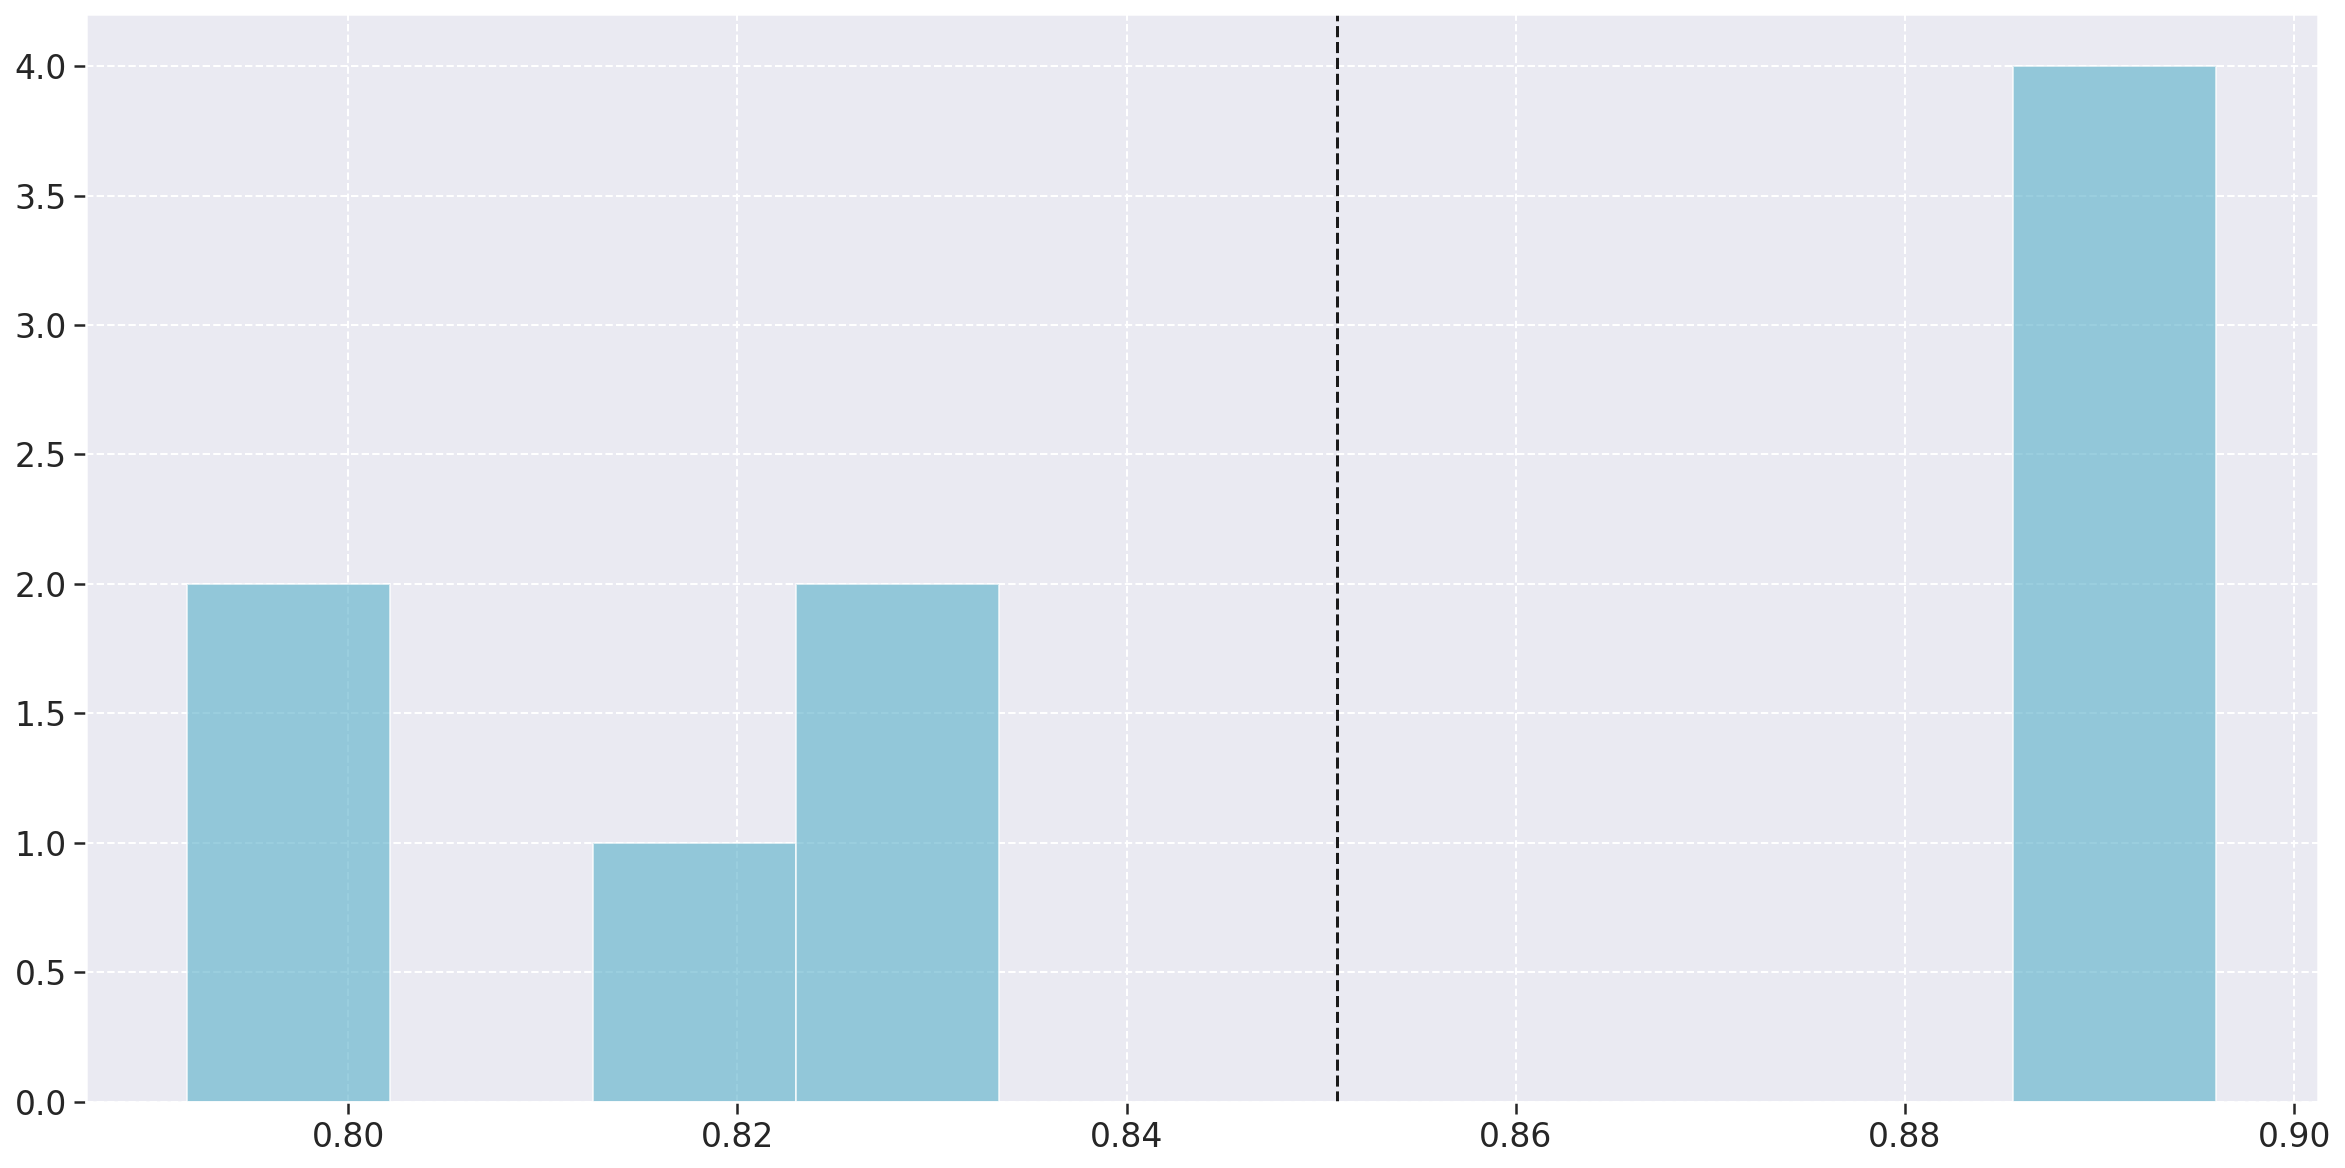

In [98]:
fig = plt.figure(figsize=(20, 10))

plt.hist(metrics_df['total'], bins=10, color='c', alpha=0.65)
plt.axvline(metrics_df['total'].mean(), color='k', linestyle='dashed')

## Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f684f22e518>,
 'caps': [<matplotlib.lines.Line2D at 0x7f684f423710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f684f22e5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f684f2d66a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f684f2d6c50>],
 'means': []}

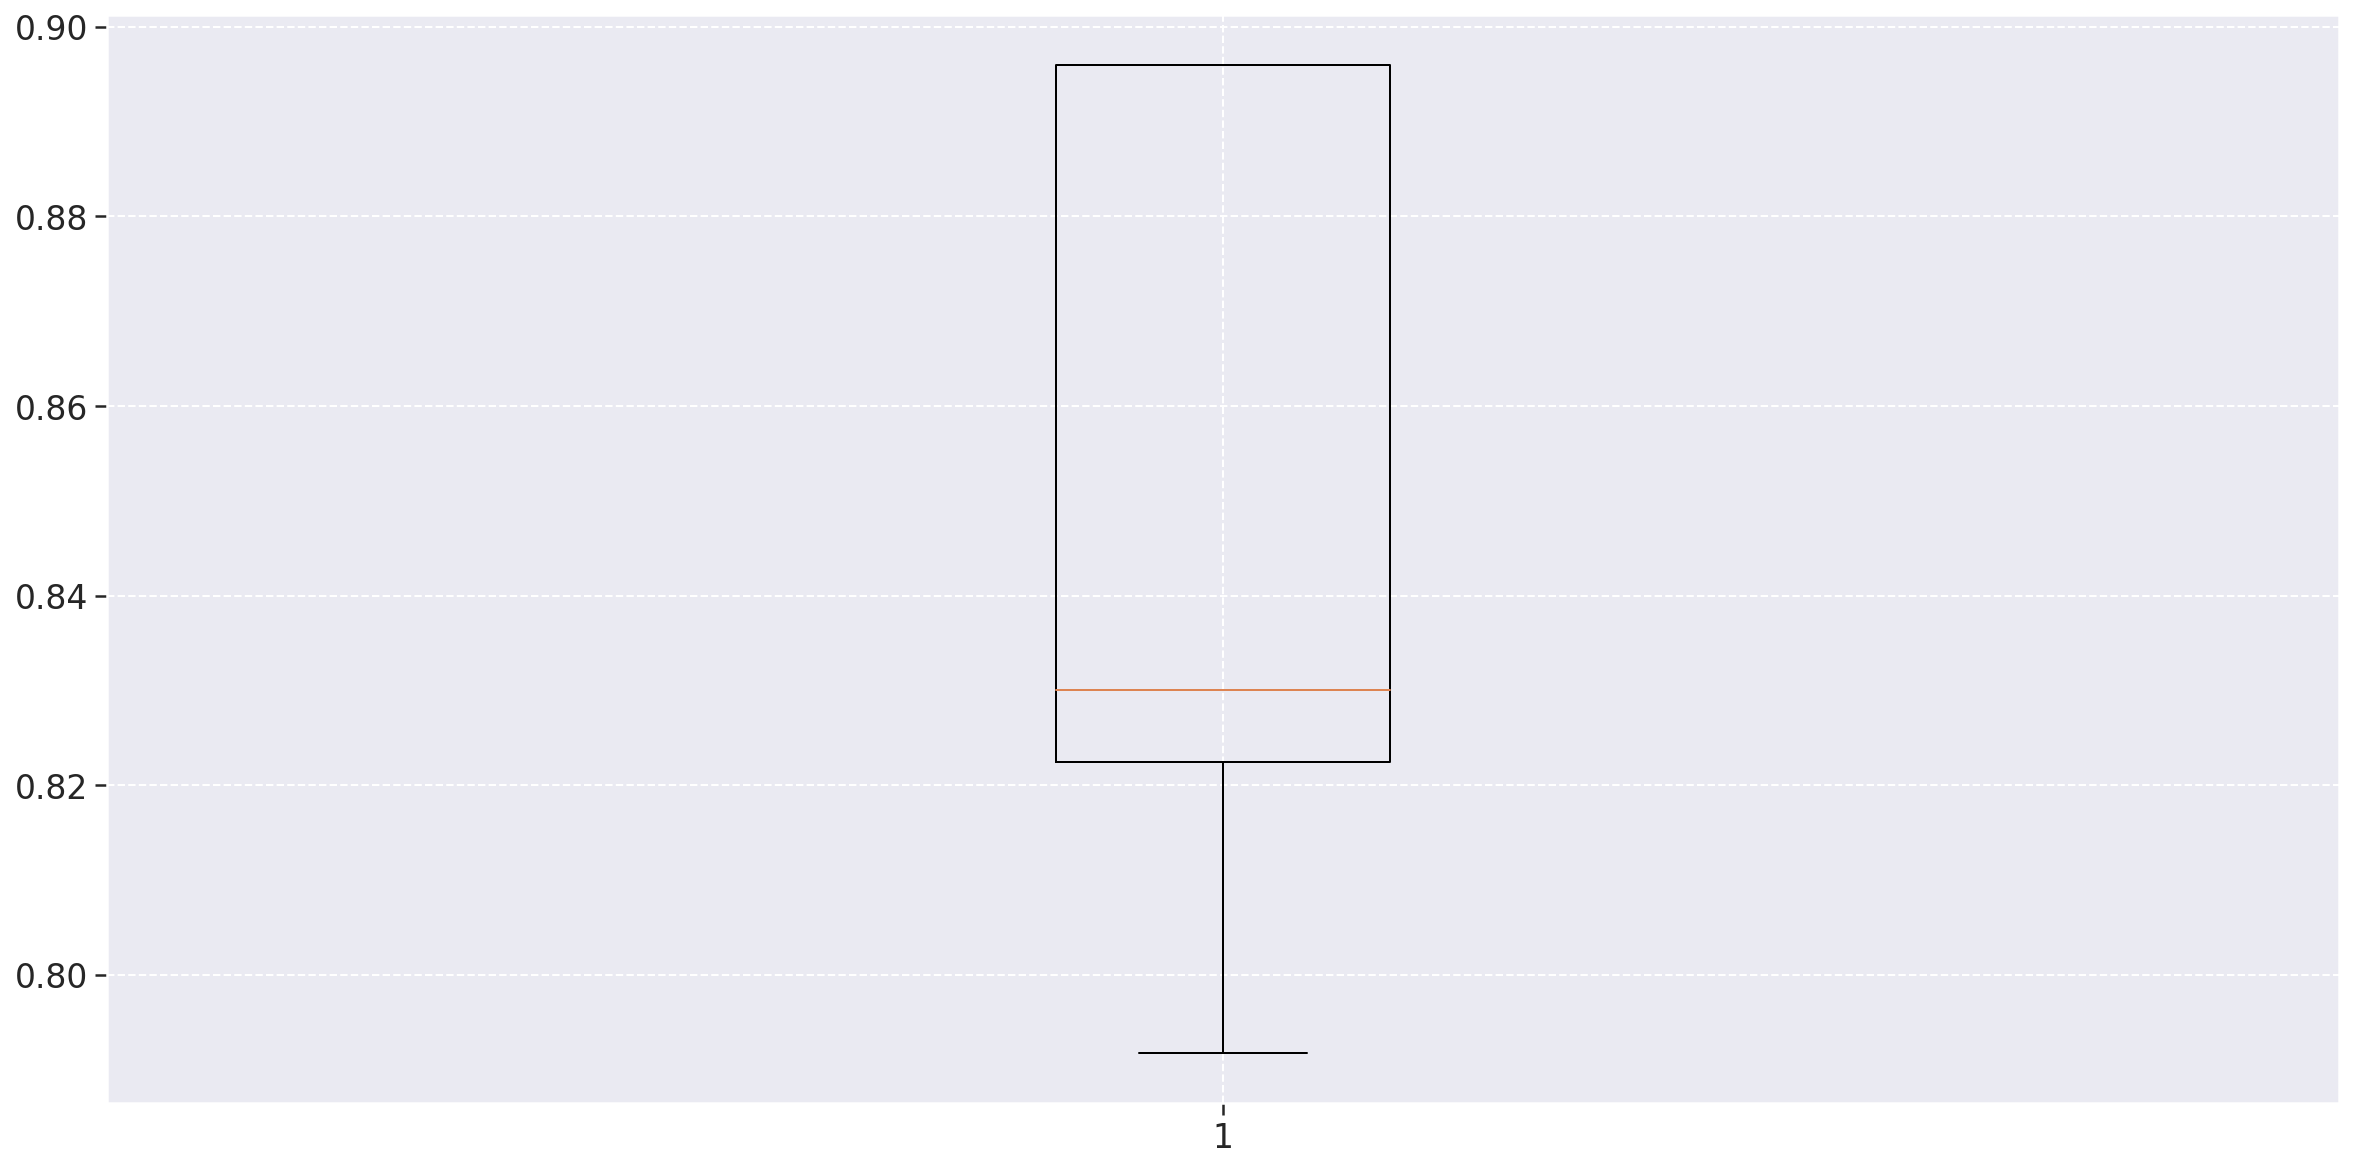

In [99]:
fig = plt.figure(figsize=(20, 10))

plt.boxplot(metrics_df['total'])

## Analysis

So, overall the total value of the metrics were great, ranging from .79 to almost .9, as we can see in both graphs.

**Histogram**: The values higher than the mean were the same, at .89, almost .9, but the mean was dragged down by the lowest values, two .79.

**Boxplot**: The median was closer to the first quartile, and a lot closer to the lower boundary, thats because 4 out of 9 values where higher than the mean but the other 5 were not, so the mean and median were a little far, by something close to .02.

**Final Words**: It's easy to see at the dataframe that both of the backend repositories got the higher values and the frontend got the lowest, but this is easy to understand why, just take a look at the number of lines in each repository. The last release lowered the metric value too, 

# Metrics to file

In [51]:
metrics_df.to_excel('./data/fga-eps-mds-2021_1-PC-GO1-TO-DATASET-ANALYSIS_DATE.xlsx', index = False)
metrics_df.to_csv('./data/fga-eps-mds-2021_1-PC-GO1-TO-DATASET-ANALYSIS_DATE.csv', index = False)